In [1]:
# Import necessary libraries

# pandas for data manipulation
import pandas as pd

# numpy for numerical computations
import numpy as np

# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plotly and bokeh for interactive data visualization
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# statsmodels for statistical modeling
import statsmodels.api as sm

# sklearn for machine learning algorithms and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

# xgboost for the XGBoost algorithm
import xgboost as xgb

# Set the style of seaborn for data visualization
sns.set_style("whitegrid")

# This line allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

# This line allows the bokeh visuals to render within your Jupyter Notebook
output_notebook()


Loading BokehJS ...

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('phonedata.csv')

# Set the maximum number of columns to display to a large number (e.g., 100)
pd.set_option('display.max_columns', 100)

# Display the first few rows of the dataset
print("First five rows of the dataset:")
display(df.head())

# Display the shape of the dataset
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the data types of each column
print("\nData types of the columns:")
display(df.dtypes)



First five rows of the dataset:


Brand                          Model       Price Launch Date  \
0  Samsung             Samsung Galaxy M14  Rs. 13,990      Apr-23   
1  Samsung     Samsung Galaxy M14 6GB RAM  Rs. 14,990      Apr-23   
2  Samsung             Samsung Galaxy M13  Rs. 10,758      Jul-22   
3  Samsung  Samsung Galaxy A12 Exynos 850  Rs. 13,999      Aug-21   
4   realme         realme realme X2 128GB  Rs. 17,999      Dec-19   

               OpSys Weight            Screen Size          Resolution  \
0         Android 13   206g  6.6 inches (16.76 cm)  1080 x 2408 pixels   
1         Android 13   206g  6.6 inches (16.76 cm)  1080 x 2408 pixels   
2         Android 12   207g  6.6 inches (16.76 cm)  1080 x 2408 pixels   
3         Android 11   205g  6.5 inches (16.51 cm)   720 x 1600 pixels   
4  Android 9.0 (Pie)   182g  6.4 inches (16.26 cm)  1080 x 2340 pixels   

      PPI   Screen Type Refresh Rate                  Processor  \
0  400ppi       PLS LCD         90Hz        Samsung Exynos 1330   
1  400ppi       PLS LCD         90Hz        Samsung Exynos 1330   
2  400ppi       PLS LCD         60Hz         Samsung Exynos 850   
3  270ppi   PLS TFT LCD         60Hz  Samsung Exynos 8 Octa 850   
4  403ppi  Super AMOLED         60Hz   Qualcomm Snapdragon 730G   

                                        CPU   RAM  Memory NoofCam  \
0  2 x 2.4GHz Cortex A786 x 2GHz Cortex A55  4 GB  128 GB  Triple   
1  2 x 2.4GHz Cortex A786 x 2GHz Cortex A55  6 GB  128 GB  Triple   
2    4 x 2GHz Cortex A554 x 2GHz Cortex A55  4 GB   64 GB  Triple   
3    4 x 2GHz Cortex A554 x 2GHz Cortex A55  4 GB   64 GB    Quad   
4    2 x 2.2GHz Kryo 4706 x 1.8GHz Kryo 470  6 GB  128 GB    Quad   

                                           MainCamMP  \
0  50 MP f/1.8 Wide Angle main camera\n10x Digita...   
1  50 MP f/1.8 Wide Angle main camera\n10x Digita...   
2  50 MP f/1.8 Wide Angle main camera\n10x Digita...   
3  48 MP f/2.0 Wide Angle main camera\n10x Digita...   
4  64 MP f/1.8 main camera\nEIS, 5x Digital Zoom8...   

                       MainCamVideo                           FrontCamMP  \
0                   1920x1080@30fps  13 MP f/2.0, Wide Angle main camera   
1                   1920x1080@30fps  13 MP f/2.0, Wide Angle main camera   
2                   1920x1080@30fps   8 MP f/2.2, Wide Angle main camera   
3                   1920x1080@30fps               8 MP f/2.2 main camera   
4  3840x2160@30fps, 1920x1080@60fps  32 MP f/2.0, Wide Angle main camera   

    Battery Wireless Ch                              Ch Type     Fingerprint  \
0  6000 mAh          No                                  Yes       Yes, Side   
1  6000 mAh          No                                  Yes       Yes, Side   
2  6000 mAh          No                                  Yes       Yes, Side   
3  5000 mAh          No                                  Yes       Yes, Side   
4  4000 mAh          No  Yes, VOOC, v4.0, 65 % in 30 minutes  Yes, On-screen   

                                         Network       SIM  
0  2G, 3G, 4G (compatible with India), VoLTE, 5G  Dual SIM  
1  2G, 3G, 4G (compatible with India), VoLTE, 5G  Dual SIM  
2      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
3      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
4      2G, 3G, 4G (compatible with India), VoLTE  Dual SIM


The dataset has 707 rows and 25 columns.

Data types of the columns:


Brand           object
Model           object
Price           object
Launch Date     object
OpSys           object
Weight          object
Screen Size     object
Resolution      object
PPI             object
Screen Type     object
Refresh Rate    object
Processor       object
CPU             object
RAM             object
Memory          object
NoofCam         object
MainCamMP       object
MainCamVideo    object
FrontCamMP      object
Battery         object
Wireless Ch     object
Ch Type         object
Fingerprint     object
Network         object
SIM             object
dtype: object

In [3]:


# Display the summary statistics of the numerical columns
print("\nSummary statistics of the numerical columns:")
display(df.describe())

# Display the count of missing values in each column
print("\nCount of missing values in each column:")
display(df.isnull().sum())

# Display the count of unique values in each column
print("\nCount of unique values in each column:")
display(df.nunique())

for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")





Summary statistics of the numerical columns:


Brand               Model       Price Launch Date       OpSys  \
count       707                 707         707         702         707   
unique       14                 707         314          81          23   
top     Samsung  Samsung Galaxy M14  Rs. 13,999      Mar-22  Android 11   
freq        127                   1          22          37         221   

       Weight            Screen Size          Resolution     PPI Screen Type  \
count     707                    707                 707     707         706   
unique    115                     51                  45      80          75   
top      190g  6.5 inches (16.51 cm)  1080 x 2400 pixels  395ppi     IPS LCD   
freq       28                     81                 285      82         177   

       Refresh Rate                Processor  \
count           566                      707   
unique            5                      129   
top           120Hz  Qualcomm Snapdragon 695   
freq            212                       33   

                                             CPU   RAM  Memory NoofCam  \
count                                        707   707     707     707   
unique                                       127     9       7       4   
top     2 x 2GHz Cortex A756 x 1.8GHz Cortex A55  8 GB  128 GB  Triple   
freq                                          34   238     382     362   

                                                MainCamMP     MainCamVideo  \
count                                                 707              688   
unique                                                372               38   
top     48 MP f/1.8 Wide Angle main camera\nPDAF, EIS,...  1920x1080@30fps   
freq                                                   10              178   

                                  FrontCamMP   Battery Wireless Ch Ch Type  \
count                                    707       707         565     671   
unique                                    99        86           2     135   
top     16 MP f/2.45, Wide Angle main camera  5000 mAh          No     Yes   
freq                                      64       325         469     218   

       Fingerprint                                    Network       SIM  
count          706                                        707       707  
unique           6                                          4         2  
top      Yes, Side  2G, 3G, 4G (compatible with India), VoLTE  Dual SIM  
freq           309                                        379       697


Count of missing values in each column:


Brand             0
Model             0
Price             0
Launch Date       5
OpSys             0
Weight            0
Screen Size       0
Resolution        0
PPI               0
Screen Type       1
Refresh Rate    141
Processor         0
CPU               0
RAM               0
Memory            0
NoofCam           0
MainCamMP         0
MainCamVideo     19
FrontCamMP        0
Battery           0
Wireless Ch     142
Ch Type          36
Fingerprint       1
Network           0
SIM               0
dtype: int64


Count of unique values in each column:


Brand            14
Model           707
Price           314
Launch Date      81
OpSys            23
Weight          115
Screen Size      51
Resolution       45
PPI              80
Screen Type      75
Refresh Rate      5
Processor       129
CPU             127
RAM               9
Memory            7
NoofCam           4
MainCamMP       372
MainCamVideo     38
FrontCamMP       99
Battery          86
Wireless Ch       2
Ch Type         135
Fingerprint       6
Network           4
SIM               2
dtype: int64

Unique values in Brand: ['Samsung' 'realme' 'Xiaomi' 'Apple' 'Sony' 'vivo' 'OPPO' 'Nokia' 'Google'
 'OnePlus' 'Motorola' 'POCO' 'Infinix' 'Nothing']
Unique values in Model: ['Samsung Galaxy M14' 'Samsung Galaxy M14 6GB RAM' 'Samsung Galaxy M13'
 'Samsung Galaxy A12 Exynos 850' 'realme realme X2 128GB'
 'Xiaomi Redmi 5 64GB' 'Xiaomi Redmi Note 11 Pro 4G'
 'Apple iPhone 13 Pro 512GB' 'Sony Xperia C4 Dual' 'vivo V3 Max'
 'vivo Y12G' 'realme realme GT 5G 256GB' 'vivo Z1x 4GB RAM'
 'Xiaomi Redmi Y3 64GB' 'OPPO Reno3 Pro 256GB'
 'Samsung Galaxy A12 Exynos 850 128GB' 'Samsung Galaxy F12 128GB'
 'Sony Xperia M5 Dual' 'vivo Y11' 'Xiaomi Mi Max' 'Nokia 5 3GB RAM'
 'vivo Y81 4GB RAM' 'Google Pixel 3 128GB' 'Nokia 3.2 32GB'
 'vivo S1 6GB RAM' 'Xiaomi Redmi Note 9 128GB' 'realme C25 128GB'
 'realme realme Narzo 30 128GB' 'Samsung Galaxy M21 2021 128GB'
 'Apple iPhone 13 Mini 512GB' 'Apple iPhone SE 2022 256GB' 'vivo Y55L'
 'vivo V5s' 'vivo Y71 32GB' 'OnePlus 6T 256GB'
 'Xiaomi Redmi Note 6 Pro 6GB 

In [4]:

# Remove non-numeric characters from 'Price' column
df['Price'] = df['Price'].str.replace('Rs. ', '').str.replace(',', '')

# Convert 'Price' column to numeric type
df['Price'] = pd.to_numeric(df['Price'])

# Drop rows with missing 'Launch Date' and 'Screen Type'
df = df.dropna(subset=['Launch Date', 'Screen Type'])


# Define the price ranges for different refresh rates based on the existing data
refresh_rate_60Hz_price_range = df[df['Refresh Rate'] == '60Hz']['Price'].quantile([0.25, 0.75]).values
refresh_rate_90Hz_price_range = df[df['Refresh Rate'] == '90Hz']['Price'].quantile([0.25, 0.75]).values
refresh_rate_120Hz_price_range = df[df['Refresh Rate'] == '120Hz']['Price'].quantile([0.25, 0.75]).values

# Assign the refresh rate values based on the price for the missing ones
df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_60Hz_price_range)), 'Refresh Rate'] = '60Hz'
df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_90Hz_price_range)), 'Refresh Rate'] = '90Hz'
df.loc[df['Refresh Rate'].isnull() & (df['Price'].between(*refresh_rate_120Hz_price_range)), 'Refresh Rate'] = '120Hz'

# For 'MainCamVideo', assign the most common value to the missing ones
most_common_MainCamVideo = df['MainCamVideo'].mode()[0]
df['MainCamVideo'] = df['MainCamVideo'].fillna(most_common_MainCamVideo)

# In 'Wireless Ch', 'Ch Type' and 'Fingerprint' fill all missing values with "No"
df['Wireless Ch'] = df['Wireless Ch'].fillna('No')
df['Ch Type'] = df['Ch Type'].fillna('No')
df['Fingerprint'] = df['Fingerprint'].fillna('Yes')


df = df.dropna(subset=['Refresh Rate'])


# Display 10 random rows from the DataFrame
df.sample(20)


Brand                             Model  Price Launch Date  \
685   Samsung             Samsung Galaxy F14 5G  13490      Mar-23   
469   Samsung           Samsung Galaxy S22 Plus  52999      Feb-22   
693   Samsung             Samsung Galaxy A54 5G  35990      Mar-23   
139      vivo              vivo V15 Pro 8GB RAM  25000      May-19   
46       vivo                         vivo Y21G  10999      Apr-22   
681      vivo                      vivo V27 Pro  37999      Mar-23   
337   Samsung                Samsung Galaxy S20  38999      Feb-20   
659   Infinix             Infinix Note 11 128GB  14999      Jan-22   
187   Samsung          Samsung Galaxy S22 256GB  52990      Feb-22   
680    Xiaomi  Xiaomi Redmi Note 12 Pro Plus 5G  29489      Jan-23   
589    realme                     realme X2 Pro  25999      Nov-19   
208   Infinix          Infinix Hot 12 Pro 128GB  11680      Aug-22   
41      Nokia                         Nokia 3.4  11499      Feb-21   
253    realme           realme realme 50A Prime  11499      Apr-22   
567   Samsung           Samsung Galaxy Z Fold 3  89999      Aug-21   
255    realme         realme realme GT Neo 2 5G  31999      Oct-21   
275      OPPO                 OPPO Reno6 Pro 5G  46990      Jul-21   
571    realme               realme 11 Pro 256GB  24499      Jun-23   
406  Motorola           Motorola G62 5G 8GB RAM  16499      Aug-22   
399   Samsung          Samsung Galaxy S20 Ultra  47900      Feb-20   

                 OpSys  Weight             Screen Size          Resolution  \
685         Android 13    205g   6.6 inches (16.76 cm)  1080 x 2408 pixels   
469         Android 12    195g   6.6 inches (16.76 cm)  1080 x 2340 pixels   
693         Android 13    202g   6.4 inches (16.26 cm)  1080 x 2340 pixels   
139  Android 9.0 (Pie)    185g  6.39 inches (16.23 cm)  1080 x 2340 pixels   
46          Android 12    182g  6.51 inches (16.54 cm)   720 x 1600 pixels   
681         Android 13    182g  6.78 inches (17.22 cm)  1080 x 2400 pixels   
337     Android 10 (Q)    163g   6.2 inches (15.75 cm)  1440 x 3200 pixels   
659         Android 11  184.5g   6.7 inches (17.02 cm)  1080 x 2400 pixels   
187         Android 12    167g   6.1 inches (15.49 cm)  1080 x 2340 pixels   
680         Android 12  208.4g  6.67 inches (16.94 cm)  1080 x 2400 pixels   
589  Android 9.0 (Pie)    199g   6.5 inches (16.51 cm)  1080 x 2400 pixels   
208         Android 12    191g   6.6 inches (16.76 cm)   720 x 1612 pixels   
41      Android 10 (Q)    180g  6.39 inches (16.23 cm)   720 x 1560 pixels   
253         Android 11  192.5g   6.6 inches (16.76 cm)  1080 x 2408 pixels   
567         Android 11    271g    7.6 inches (19.3 cm)  1768 x 2208 pixels   
255         Android 11    200g  6.62 inches (16.81 cm)  1080 x 2400 pixels   
275         Android 11    177g  6.55 inches (16.64 cm)  1080 x 2400 pixels   
571         Android 13    185g   6.7 inches (17.02 cm)  1080 x 2412 pixels   
406         Android 12    184g   6.5 inches (16.51 cm)  1080 x 2400 pixels   
399     Android 10 (Q)    220g   6.9 inches (17.53 cm)  1440 x 3200 pixels   

        PPI                                        Screen Type Refresh Rate  \
685  400ppi                                            PLS LCD         90Hz   
469  390ppi                            Dynamic AMOLED, HDR 10+        120Hz   
693  403ppi                                       Super AMOLED        120Hz   
139  403ppi                    Super AMOLED, 2.5D Curved Glass        120Hz   
46   270ppi                                            IPS LCD         60Hz   
681  388ppi                    AMOLED, Curved Display, HDR 10+        120Hz   
337  566ppi  Dynamic AMOLED, 2.5D Curved Glass, Curved Disp...        120Hz   
659  393ppi                                             AMOLED         60Hz   
187  422ppi                            Dynamic AMOLED, HDR 10+        120Hz   
680  395ppi                      AMOLED, Dolby Vision, HDR 10+        120Hz   
589  405ppi           Super A

In [5]:

# Import necessary libraries
from datetime import datetime
import re

# Drop the 'Model' column
df = df.drop(columns='Model')

# Convert 'Launch Date' to datetime and then to 'Age' in months
df['Launch Date'] = pd.to_datetime(df['Launch Date'], format='%b-%y')
df['Age'] = ((pd.to_datetime('2023-06-20') - df['Launch Date']).dt.days / 30).astype(int)
df = df.drop(columns='Launch Date')


# Keep only 'Android XX' or 'iOS XX' in 'OpSys'
df['OpSys'] = df['OpSys'].apply(lambda x: re.match('(Android \d+|iOS \d+)', x).group(0) if re.match('(Android \d+|iOS \d+)', x) else np.nan)

# Remove "g" from 'Weight'
df['Weight'] = df['Weight'].str.replace('g', '').astype(float)

# Keep only X.X in 'Screen Size'
df['Screen Size'] = df['Screen Size'].str.extract('(\d+\.\d+)').astype(float)

# Split 'Resolution' into 'Resolution X' and 'Resolution Y'
df['Resolution'] = df['Resolution'].str.replace(' pixels', '')
df[['Resolution X', 'Resolution Y']] = df['Resolution'].str.split(' x ', expand=True).astype(int)
df = df.drop(columns='Resolution')


# Remove 'ppi' from 'PPI'
df['PPI'] = df['PPI'].str.replace('ppi', '').astype(int)

# Simplify 'Screen Type'
df['Screen Type'] = df['Screen Type'].apply(lambda x: 'AMOLED' if 'AMOLED' in x else ('LCD' if 'LCD' in x or 'TFT' in x else ('OLED' if 'OLED' in x else 'Other')))


# Remove 'Hz' from 'Refresh Rate'
df['Refresh Rate'] = df['Refresh Rate'].str.lower().str.replace('hz', '').astype(int)

# Drop 'Processor' column
df = df.drop(columns='Processor')

# Convert 'RAM' and 'Memory' to GB and then to integer
df['RAM'] = df['RAM'].apply(lambda x: float(x.replace('GB', '')) if 'GB' in x else float(x.replace('MB', ''))/1024).astype(int)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(int)

# Change 'NoofCam' values to numerical
df['NoofCam'] = df['NoofCam'].map({'Single': 1, 'Dual': 2, 'Triple': 3, 'Quad': 4})

# Keep only 'XX MP' in 'MainCamMP' and 'FrontCamMP'
df['MainCamMP'] = df['MainCamMP'].str.extract('(\d+)').astype(str)
df['FrontCamMP'] = df['FrontCamMP'].str.extract('(\d+)').astype(str)

# Convert 'MainCamMP' and 'FrontCamMP' to integer
df['MainCamMP'] = df['MainCamMP'].astype(int)
df['FrontCamMP'] = df['FrontCamMP'].astype(int)


# Keep only 'XXXX' in 'Battery'
df['Battery'] = df['Battery'].str.extract('(\d+)').astype(int)

# Convert the values in 'Wireless Ch', 'Ch Type' and 'Fingerprint' to lowercase and remove leading/trailing spaces
df['Wireless Ch'] = df['Wireless Ch'].str.lower().str.strip()
df['Ch Type'] = df['Ch Type'].str.lower().str.strip()
df['Fingerprint'] = df['Fingerprint'].str.lower().str.strip()

# Now perform the mapping
df['Wireless Ch'] = df['Wireless Ch'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))
df['Ch Type'] = df['Ch Type'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))
df['Fingerprint'] = df['Fingerprint'].apply(lambda x: 1 if 'yes' in x else (0 if 'no' in x else x))


# Rename 'Ch Type' to 'Fast Charging'
df = df.rename(columns={'Ch Type': 'Fast Charging'})

# If 'SIM' value is 'Dual SIM' then make it 1 else 0 and change the attribute name to 'Dual SIM'
df['SIM'] = df['SIM'].apply(lambda x: 1 if x == 'Dual SIM' else 0)
df = df.rename(columns={'SIM': 'Dual SIM'})

# Create two attributes '4G' and '5G' and check all rows of 'Network' for the string "4G" and "5G" and assign 0/1 to the attributes of '4G' and '5G'
df['4G'] = df['Network'].apply(lambda x: 1 if '4G' in x else 0)
df['5G'] = df['Network'].apply(lambda x: 1 if '5G' in x else 0)
df['3G'] = df['Network'].apply(lambda x: 1 if '3G' in x else 0)
df = df.drop(columns='Network')

# Display the DataFrame
df.sample(20)



Brand  Price       OpSys  Weight  Screen Size  PPI Screen Type  \
404      POCO  16499  Android 11   205.0         6.67  395      AMOLED   
506      POCO  27999  Android 12   195.0         6.67  395      AMOLED   
658    realme  19999  Android 11   176.0         6.40  411      AMOLED   
689      POCO  29999  Android 13   181.0         6.67  395      AMOLED   
566     Apple  59900      iOS 14   162.0         6.10  457        OLED   
608      vivo  12970  Android 11   192.3         6.51  270         LCD   
73       POCO  34999  Android 11   205.0         6.67  395      AMOLED   
57    Infinix  11999  Android 11   205.0         6.78  399         LCD   
244      POCO  17499  Android 11   205.0         6.67  395      AMOLED   
437     Apple  61999      iOS 15   173.0         6.10  457        OLED   
452   Samsung  26979  Android 11   190.0         6.50  405      AMOLED   
456   Samsung  11999  Android 12   195.0         6.50  270         LCD   
110   Infinix  14999  Android 10   207.0         6.95  258         LCD   
135      vivo  21300   Android 7   160.0         5.99  269         LCD   
610   Samsung  69999  Android 12   187.0         6.70  426      AMOLED   
325  Motorola  49999  Android 10   203.0         6.70  385        OLED   
591   OnePlus  37490  Android 11   183.0         6.55  402      AMOLED   
297      OPPO  15998  Android 12   187.0         6.56  269         LCD   
491   Infinix  15999  Android 12   196.0         6.70  393      AMOLED   
99       vivo  30000   Android 6   158.6         5.50  401         LCD   

     Refresh Rate                                                CPU  RAM  \
404           120             2 x 2.2GHz Kryo 6606 x 1.7GHz Kryo 660    6   
506           120  1 x 3.2GHz Kryo 5853 x 2.42GHz Kryo 5854 x 1.8...    6   
658            60             2 x 2.3GHz Kryo 4656 x 1.8GHz Kryo 465    8   
689           120    1 x 2.91GHz Kryo3 x 2.49GHz Kryo4 x 1.8GHz Kryo    8   
566            60            2 x 3.1GHz Firestorm4 x 1.8GHz Icestorm    4   
608            60           2 x 2GHz Cortex A756 x 1.8GHz Cortex A55    4   
73            120  1 x 3GHz Cortex A783 x 2.6GHz Cortex A784 x 2G...    8   
57             90           2 x 2GHz Cortex A756 x 1.8GHz Cortex A55    4   
244           120             2 x 2.2GHz Kryo 6606 x 1.7GHz Kryo 660    6   
437            60          2 x 3.23GHz Avalanche4 x 1.82GHz Blizzard    4   
452           120  1 x 2.84GHz Kryo 5853 x 2.42GHz Kryo 5854 x 1....    8   
456            90           2 x 2.2GHz Cortex A766 x 2GHz Cortex A55    4   
110            60           2 x 2GHz Cortex A756 x 1.7GHz Cortex A55    4   
135            60                              8 x 1.8GHz Cortex A53    4   
610           120  1 x 3.2GHz Cortex X23 x 2.75GHz Cortex A7104 x...    8   
325            90  1 x 2.84GHz Kryo 5853 x 2.42GHz Kryo 5854 x 1....   12   
591           120  1 x 2.84GHz Kryo 6803 x 2.42GHz Kryo 6804 x 1....   12   
297            60         4 x 2.3GHz Cortex A534 x 1.8GHz Cortex A53    4   
491            90           2 x 2.2GHz Cortex A766 x 2GHz Cortex A55    8   
99            120                                8 x 2GHz Cortex A53    4   

     Memory  NoofCam  MainCamMP  \
404      64        3         64   
506     128        3         64   
658     128        4        108   
689     256        3         64   
566     128        2         12   
608      64        3         13   
73      128        3         64   
57      128        2         50   
244     128        3         64   
437     128        2         12   
452     128        3         12   
456      64        2         50   
110      64        3         48   
135      64        1         16   
610     256        2         12   
325     256        3        108   
591     256        3         48   
297     128        2         50   
491     128        3        108   
99       64        1         16   

                                          MainCamVideo  FrontCamMP  Battery  \
404                 

In [6]:
import pandas as pd
import re

# Assuming df is your DataFrame and 'CPU' and 'MainCamVideo' are the columns

# Initialize new columns
df['MaxSpeed'] = 0.0
df['MaxVideoResolutionWidth'] = 0
df['MaxVideoResolutionHeight'] = 0
df['MaxFrameRate'] = 0

def extract_max_speed(cpu_info):
    max_speed = 0.0

    # regex pattern to find 'x GHz' phrases
    pattern = r"(\d+)\s*x\s*([\d\.]+)GHz"

    matches = re.findall(pattern, cpu_info)
    
    for match in matches:
        _, speed = match
        speed = float(speed)

        if speed > max_speed:
            max_speed = speed

    return max_speed

# apply the function to the 'CPU' column and create new columns
df['MaxSpeed'] = df['CPU'].apply(extract_max_speed)

# Parse MainCamVideo information
for i, row in df.iterrows():
    if pd.isnull(row['MainCamVideo']):
        continue
    video_info = row['MainCamVideo'].split(',')
    max_resolution_width = 0
    max_resolution_height = 0
    max_frame_rate = 0
    for info in video_info:
        match = re.match(r'(\d+)x(\d+)@(\d+)', info)
        if match:
            width, height, frame_rate = match.groups()
            width = int(width)
            height = int(height)
            frame_rate = int(frame_rate)
            if width > max_resolution_width:
                max_resolution_width = width
            if height > max_resolution_height:
                max_resolution_height = height
            if frame_rate > max_frame_rate:
                max_frame_rate = frame_rate
    df.loc[i, 'MaxVideoResolutionWidth'] = max_resolution_width
    df.loc[i, 'MaxVideoResolutionHeight'] = max_resolution_height
    df.loc[i, 'MaxFrameRate'] = max_frame_rate

# Drop original CPU and MainCamVideo columns
df = df.drop(columns=['CPU', 'MainCamVideo'])


In [7]:


# Display the summary statistics of the numerical columns
print("\nSummary statistics of the numerical columns:")
display(df.describe())

# Display the count of missing values in each column
print("\nCount of missing values in each column:")
display(df.isnull().sum())

# Display the count of unique values in each column
print("\nCount of unique values in each column:")
display(df.nunique())

for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")





Summary statistics of the numerical columns:


Price      Weight  Screen Size         PPI  Refresh Rate  \
count    656.000000  656.000000   656.000000  656.000000    656.000000   
mean   25247.867378  187.524390     6.468171  387.833841     90.795732   
std    16572.954943   16.562791     0.329420   60.078078     26.359019   
min    10099.000000  124.000000     4.000000  218.000000     60.000000   
25%    14384.250000  179.000000     6.430000  393.000000     60.000000   
50%    18994.000000  189.000000     6.530000  400.000000     90.000000   
75%    29990.000000  198.000000     6.670000  409.000000    120.000000   
max    99900.000000  271.000000     7.600000  568.000000    144.000000   

              RAM      Memory     NoofCam   MainCamMP  FrontCamMP  \
count  656.000000  656.000000  656.000000  656.000000  656.000000   
mean     6.611280  136.030488    2.890244   50.213415   17.413110   
std      2.421241   73.302046    0.798947   29.654708   10.292297   
min      0.000000    4.000000    1.000000    5.000000    2.000000   
25%      4.000000   64.000000    2.000000   48.000000    8.000000   
50%      6.000000  128.000000    3.000000   50.000000   16.000000   
75%      8.000000  128.000000    3.000000   64.000000   20.000000   
max     16.000000  512.000000    4.000000  200.000000   60.000000   

           Battery  Wireless Ch  Fast Charging  Fingerprint    Dual SIM  \
count   656.000000   656.000000     656.000000   656.000000  656.000000   
mean   4642.032012     0.129573       0.919207     0.955793    0.989329   
std     765.651201     0.336090       0.272724     0.205712    0.102825   
min    1700.000000     0.000000       0.000000     0.000000    0.000000   
25%    4353.750000     0.000000       1.000000     1.000000    1.000000   
50%    5000.000000     0.000000       1.000000     1.000000    1.000000   
75%    5000.000000     0.000000       1.000000     1.000000    1.000000   
max    7000.000000     1.000000       1.000000     1.000000    1.000000   

              Age  Resolution X  Resolution Y          4G          5G     3G  \
count  656.000000    656.000000    656.000000  656.000000  656.000000  656.0   
mean    23.832317   1041.109756   2283.966463    0.998476    0.474085    1.0   
std     18.116820    168.963721    381.655316    0.039043    0.499709    0.0   
min      0.000000    480.000000    800.000000    0.000000    0.000000    1.0   
25%     11.000000   1080.000000   2340.000000    1.000000    0.000000    1.0   
50%     18.000000   1080.000000   2400.000000    1.000000    0.000000    1.0   
75%     33.000000   1080.000000   2400.000000    1.000000    1.000000    1.0   
max     99.000000   1768.000000   3216.000000    1.000000    1.000000    1.0   

         MaxSpeed  MaxVideoResolutionWidth  MaxVideoResolutionHeight  \
count  656.000000               656.000000                656.000000   
mean     2.384832              3199.024390               1799.451220   
std      0.410432              1495.611175                841.281286   
min      1.200000              1280.000000                720.000000   
25%      2.050000              1920.000000               1080.000000   
50%      2.300000              3840.000000               2160.000000   
75%      2.707500              3840.000000               2160.000000   
max      3.360000              7680.000000               4320.000000   

       MaxFrameRate  
count    656.000000  
mean      30.310976  
std        4.941267  
min       24.000000  
25%       30.000000  
50%       30.000000  
75%       30.000000  
max       60.000000


Count of missing values in each column:


Brand                       0
Price                       0
OpSys                       0
Weight                      0
Screen Size                 0
PPI                         0
Screen Type                 0
Refresh Rate                0
RAM                         0
Memory                      0
NoofCam                     0
MainCamMP                   0
FrontCamMP                  0
Battery                     0
Wireless Ch                 0
Fast Charging               0
Fingerprint                 0
Dual SIM                    0
Age                         0
Resolution X                0
Resolution Y                0
4G                          0
5G                          0
3G                          0
MaxSpeed                    0
MaxVideoResolutionWidth     0
MaxVideoResolutionHeight    0
MaxFrameRate                0
dtype: int64


Count of unique values in each column:


Brand                        14
Price                       296
OpSys                        16
Weight                      113
Screen Size                  50
PPI                          70
Screen Type                   3
Refresh Rate                  4
RAM                           9
Memory                        7
NoofCam                       4
MainCamMP                    14
FrontCamMP                   17
Battery                      78
Wireless Ch                   2
Fast Charging                 2
Fingerprint                   2
Dual SIM                      2
Age                          78
Resolution X                 11
Resolution Y                 40
4G                            2
5G                            2
3G                            1
MaxSpeed                     35
MaxVideoResolutionWidth       6
MaxVideoResolutionHeight      6
MaxFrameRate                  3
dtype: int64

Unique values in Brand: ['Samsung' 'realme' 'Xiaomi' 'Apple' 'Sony' 'vivo' 'OPPO' 'Nokia' 'Google'
 'OnePlus' 'Motorola' 'POCO' 'Infinix' 'Nothing']
Unique values in Price: [13990 14990 10758 13999 17999 10999 18390 91999 23499 18000 41999 15990
 11999 34000 12499 27590 10500 15000 18999 12000 17200 14999 15499 89999
 64900 21000 31999 12990 26999 16490 11189 18450 11499 13499 59999 11699
 10294 36999 15999 19999 74900 22999 31480 77000 26990 15465 14690 34999
 14499 12999 25999 29999 19499 27000 27990 24990 10499 12489 24999 13899
 30000 71400 15490 16499 10199 16599 17271 41699 19994 14899 13000 38959
 47999 55999 12649 51990 27779 16799 15495 18619 16990 21300 17990 25000
 52999 34990 27994 16249 10990 19990 42999 14180 14299 21990 11485 29990
 16999 10400 14209 72999 15480 27249 13090 27999 15998 52990 29600 16294
 12500 21699 29000 19600 33000 16699 11680 32999 63999 12900 49999 17494
 28799 19500 97999 17600 32499 46390 20990 27499 58889 11399 51999 18499
 22987 17499 33999 23994

In [8]:
df.sample(20)

Brand  Price       OpSys  Weight  Screen Size  PPI Screen Type  \
210      POCO  15999  Android 11   195.0         6.60  399         LCD   
706    realme  23999  Android 13   185.0         6.70  394      AMOLED   
85       vivo  14999  Android 12   190.0         6.55  270         LCD   
353   Samsung  34999  Android 13   202.0         6.40  403      AMOLED   
1     Samsung  14990  Android 13   206.0         6.60  400         LCD   
31       vivo  12000   Android 6   142.0         5.20  282         LCD   
75       OPPO  15990  Android 11   175.0         6.52  269         LCD   
406  Motorola  16499  Android 12   184.0         6.50  405         LCD   
17       Sony  27590   Android 5   142.6         5.00  441         LCD   
542   Samsung  74499  Android 10   208.0         6.90  494      AMOLED   
511     Nokia  36999  Android 12   185.0         6.43  409      AMOLED   
615      OPPO  18994  Android 11   172.0         6.43  409      AMOLED   
586    realme  10999  Android 10   209.0         6.52  269         LCD   
194    realme  10499  Android 11   200.0         6.50  270         LCD   
91       POCO  14999  Android 10   209.0         6.67  395         LCD   
600    Google  25999  Android 11   168.0         6.20  416        OLED   
297      OPPO  15998  Android 12   187.0         6.56  269         LCD   
107    Xiaomi  16599   Android 9   173.8         6.08  283      AMOLED   
226      OPPO  20990  Android 10   163.0         6.44  409      AMOLED   
391    realme  19999  Android 11   199.0         6.60  400         LCD   

     Refresh Rate  RAM  Memory  NoofCam  MainCamMP  FrontCamMP  Battery  \
210            90    8     128        2         50          16     5000   
706           120    8     128        2        100          16     5000   
85             60    4     128        2         50           8     5000   
353           120    8     256        3         50          32     5000   
1              90    6     128        3         50          13     6000   
31             60    2      16        1          8           5     2650   
75             60    4      64        1         13           5     4230   
406           120    8     128        3         50          16     5000   
17             60    3      16        1         21          13     2600   
542           120   12     256        3        108          10     4500   
511            90    8     256        2         50          16     4200   
615            60    8     256        4         48          16     4310   
586            60    3      32        3         13           5     6000   
194            60    4     128        3         50           8     5000   
91             60    6     128        4         48          16     5000   
600           120    6     128        2         12           8     3885   
297            60    4     128        2         50           8     5000   
107            60    6     128        3         48          32     4030   
226            60    6     128        4         16          16     4015   
391           144    6     128        3         48          16     5000   

     Wireless Ch  Fast Charging  Fingerprint  Dual SIM  Age  Resolution X  \
210            0              1            1         1   16          1080   
706            0              1            1         1    0          1080   
85             0              1            1         1    2           720   
353            0              1            1         1    3          1080   
1              0              1            1         1    2          1080   
31             0              0            0         1   81           720   
75             0              0            0         1   15           720   
406            0              1            1         1   10          1080   
17             0              0            0         1   94          1080   
542            1              1            1         1   35          1440   
511            0              

Correlation between OpSys and Price: 0.3504515139610419


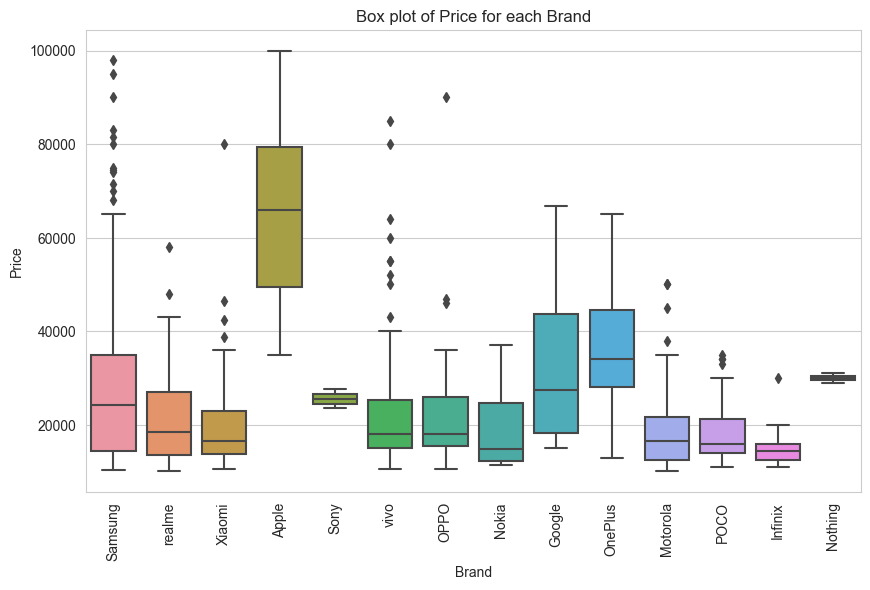

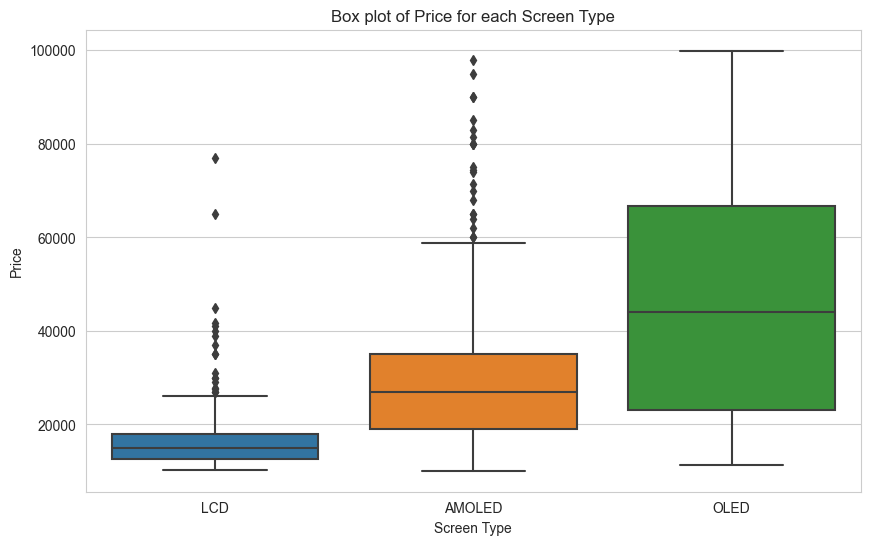

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert OpSys to numerical
df['OpSys_num'] = df['OpSys'].str.extract('(\d+)').astype(float)

# Calculate correlation with price
correlation = df[['OpSys_num', 'Price']].corr().iloc[0, 1]
print(f'Correlation between OpSys and Price: {correlation}')

# Box plot for Brand and Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Box plot of Price for each Brand')
plt.show()

# Box plot for Screen Type and Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Screen Type', y='Price', data=df)
plt.title('Box plot of Price for each Screen Type')
plt.show()


In [9]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Drop the 'OpSys_num' column if it exists
if 'OpSys_num' in df.columns:
    df = df.drop(['OpSys_num'], axis=1)

# Split OpSys into type and version number
df[['OpSys_type', 'OpSys_version']] = df['OpSys'].str.split(' ', expand=True)

# Convert version number to float
df['OpSys_version'] = df['OpSys_version'].astype(float)

# One-hot encoding for 'OpSys_type'
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[['OpSys_type']])

# Create column names for the one-hot encoded variables
columns = ['OpSys_type_' + cat for cat in onehot_encoder.categories_[0][1:]]

# Create a dataframe for the one-hot encoded variables
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=columns)

# Reset the index of the original dataframe and the one-hot encoded dataframe
df = df.reset_index(drop=True)
onehot_encoded_df = onehot_encoded_df.reset_index(drop=True)

# Add the one-hot encoded variables to the dataframe
df = pd.concat([df, onehot_encoded_df], axis=1)

# Drop the original 'OpSys' and 'OpSys_type' columns
df = df.drop(['OpSys', 'OpSys_type'], axis=1)


df.sample(20)

c:\Users\Shreyansh Rai\Projects\INTEL\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Brand  Price  Weight  Screen Size  PPI Screen Type  Refresh Rate  RAM  \
466     vivo  16200   188.0         6.58  401         LCD            90    8   
488     vivo  54999   206.0         6.78  388      AMOLED           120    8   
258   Xiaomi  17990   157.0         6.55  402      AMOLED            90    6   
285   Xiaomi  15499   195.0         6.60  399         LCD            90    6   
398   Google  66800   212.0         6.70  513        OLED           120   12   
649     vivo  32999   180.0         6.78  388      AMOLED           120    8   
188     vivo  16699   188.0         6.58  401         LCD            60    8   
173     POCO  13999   200.0         6.58  400         LCD            90    6   
449     OPPO  16499   187.0         6.56  269         LCD            90    8   
52    realme  19999   194.0         6.50  405         LCD           120    8   
214  Samsung  11399   192.0         6.40  403      AMOLED            60    4   
419   realme  31999   172.5         6.70  394      AMOLED           120    8   
587  Samsung  26990   184.0         6.40  411      AMOLED            90    8   
494  Samsung  14499   191.0         6.40  403      AMOLED            60    6   
569     vivo  15000   163.5         6.22  270         LCD            60    4   
167   Xiaomi  10999   203.0         6.70  269         LCD            60    6   
413    Apple  78999   203.0         6.70  457        OLED            60    6   
271     OPPO  24999   175.0         6.40  411      AMOLED            90    8   
629   Xiaomi  29489   208.4         6.67  395      AMOLED           120    8   
609  Infinix  14999   184.5         6.70  393      AMOLED            60    6   

     Memory  NoofCam  MainCamMP  FrontCamMP  Battery  Wireless Ch  \
466     128        3         50          16     5000            0   
488     128        3         50          32     4500            0   
258     128        3         64          16     4250            0   
285      64        2         50          16     5000            0   
398     128        3         50          10     5000            1   
649     128        3         50          50     4600            0   
188     128        3         48          16     5000            0   
173     128        2         50           8     5000            0   
449     128        2         50           8     5000            0   
52      128        3         48          16     5000            0   
214      64        3         48          20     6000            0   
419     256        3        108          16     5000            0   
587     128        4         64          20     5000            0   
494     128        3         64          32     6000            0   
569      64        2         13          20     4030            0   
167     128        2         50           5     6000            0   
413     128        2         12          12     4325            1   
271     128        4         64          44     4025            0   
629     256        3        200          16     4980            0   
609     128        2         50          16     5000            0   

     Fast Charging  Fingerprint  Dual SIM  Age  Resolution X  Resolution Y  \
466              1            1         1   10          1080          2408   
488              1            1         1   13          1080          2400   
258              1            1         1   24          1080          2400   
285              1            1         1   18          1080          2400   
398              1            1         1    8          1440          3120   
649              1            1         1    3          1080          2400   
188              1            1         1   30          1080          2408   
173              1            1         1   13          1080          2400   
449              1            1         1    8           720          1612   
52               1            1         1   28          1080          2400   
214              1

In [10]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Drop the 'iOS type' feature
df = df.drop(['OpSys_type_iOS'], axis=1)

# One-hot encoding for 'Screen Type'
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[['Screen Type']])

# Create column names for the one-hot encoded variables
columns = ['ScreenType_' + cat for cat in onehot_encoder.categories_[0][1:]]

# Create a dataframe for the one-hot encoded variables
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=columns)

# Reset the index of the original dataframe and the one-hot encoded dataframe
df = df.reset_index(drop=True)
onehot_encoded_df = onehot_encoded_df.reset_index(drop=True)

# Add the one-hot encoded variables to the dataframe
df = pd.concat([df, onehot_encoded_df], axis=1)

# Drop the original 'Screen Type' column
df = df.drop(['Screen Type'], axis=1)


c:\Users\Shreyansh Rai\Projects\INTEL\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Import necessary libraries
import category_encoders as ce

# Target mean encoding for 'Brand'
target_encoder = ce.TargetEncoder(smoothing=0.1)
df['Brand_encoded'] = target_encoder.fit_transform(df['Brand'], df['Price'])

# Drop the original 'Brand' column
df = df.drop(['Brand'], axis=1)
df.sample(20)

Price  Weight  Screen Size  PPI  Refresh Rate  RAM  Memory  NoofCam  \
275  17999   187.0         6.58  401            60    8     128        3   
635  21999   195.0         6.72  392           120    8     256        3   
510  39900   148.0         4.70  326           120    2      64        1   
462  47999   167.0         6.10  422           120    8     128        3   
318  16999   172.0         6.44  409            60    8     128        3   
644  13999   184.0         6.58  401            60    6     128        2   
455  14999   186.0         6.70  393            60    6      64        2   
278  11499   194.0         6.60  400           120    4      64        3   
511  25999   181.0         6.38  413            90    8     256        3   
152  29990   186.0         6.43  409           120    8     128        3   
18   11999   203.0         6.40  344            60    3      32        1   
353  28999   204.0         6.67  395           120    8     128        3   
556  33999   173.0         6.20  531           120    4      64        1   
76   14999   190.0         6.55  270            60    4     128        2   
212  12499   184.5         6.70  393            60    4      64        2   
321  64999   205.0         6.70  526           120   16     256        3   
457  23647   200.0         6.60  407           144    8     256        3   
349  13999   187.0         6.56  269            60    4      64        2   
272  15998   187.0         6.56  269            60    4     128        2   
178  10499   200.0         6.50  270            60    4     128        3   

     MainCamMP  FrontCamMP  Battery  Wireless Ch  Fast Charging  Fingerprint  \
275         50          16     5000            0              1            1   
635        108          16     5000            0              1            1   
510         12           7     1821            1              1            1   
462         50          10     3700            1              1            1   
318         50          44     4050            0              1            1   
644         50           8     5000            0              1            1   
455         50          16     5000            0              1            1   
278         50          16     5000            0              1            1   
511         64          16     4500            0              1            1   
152         64          16     4500            0              1            1   
18          16           5     4850            0              0            1   
353        108          16     5000            0              1            1   
556         12           8     3500            1              1            1   
76          50           8     5000            0              1            1   
212         50          16     5000            0              1            1   
321         50          16     5000            0              1            1   
457         64          16     5080            0              1            1   
349         13           8     5000            0              1            1   
272         50           8     5000            0              1            1   
178         50           8     5000            0              1            1   

     Dual SIM  Age  Resolution X  Resolution Y  4G  5G  3G  MaxSpeed  \
275         1   17          1080          2408   1   1   1      2.20   
635         1    2          1080          2400   1   1   1      2.20   
510         0   70           750          1334   1   0   1      2.39   
462         1   16          1080          2340   1   1   1      3.00   
318         1   13          1080          2400   1   0   1      2.05   
644         1    2          1080          2408   1   1   1      2.20   
455         1   11          1080          2400   1   1   1      2.40   
278         1   21          1080          2412   1   0   1      2.05   
511         1    2          1080          2400   1   1   1      2.20   
152    

In [16]:
#drop 3G column
df = df.drop(['3G'], axis=1)


#print the unmber of rows and columns and total number of missing values in the dataset
print("Number of rows and columns in the dataset:", df.shape)
print("Total number of missing values in the dataset:", df.isnull().sum().sum())




Number of rows and columns in the dataset: (656, 28)
Total number of missing values in the dataset: 0


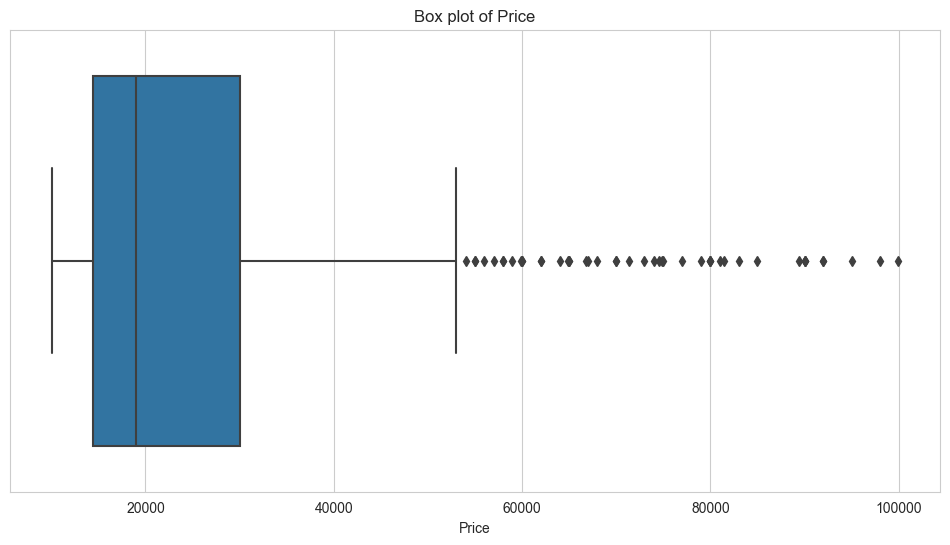

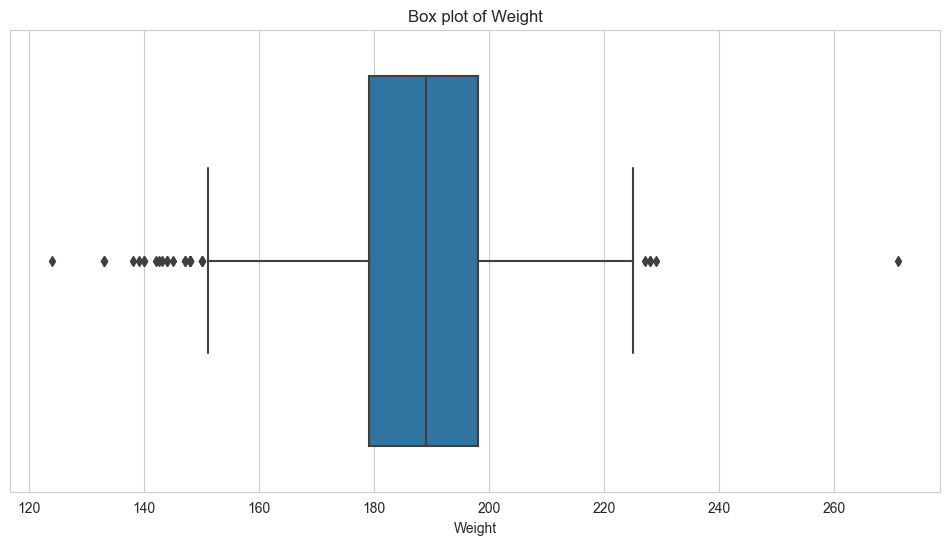

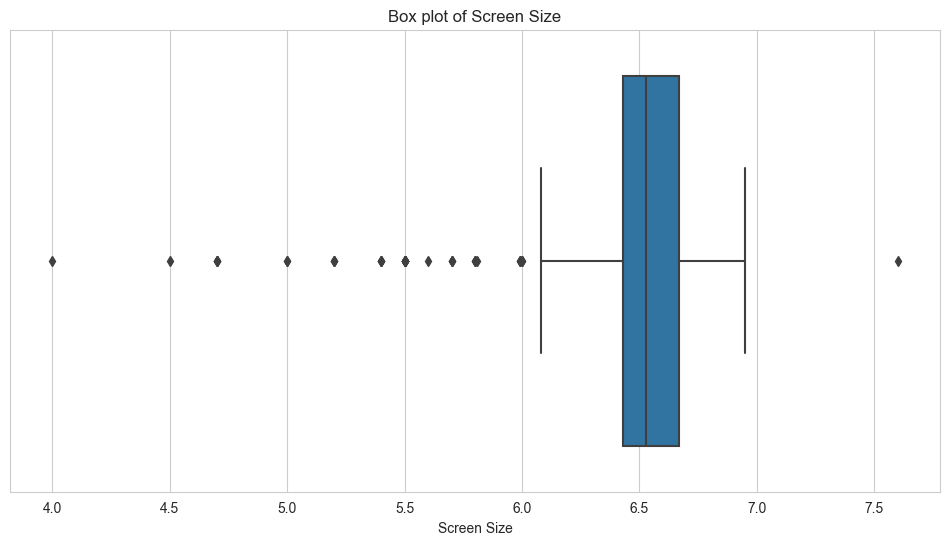

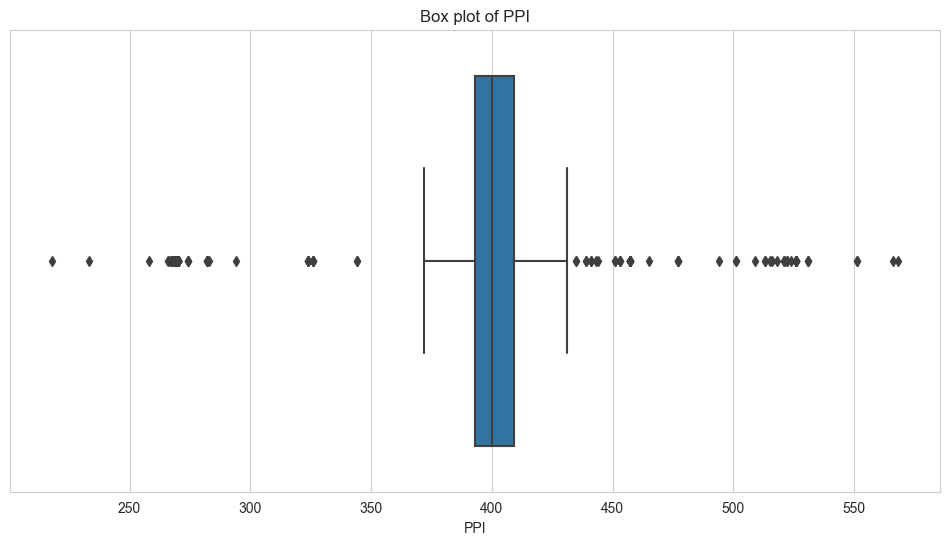

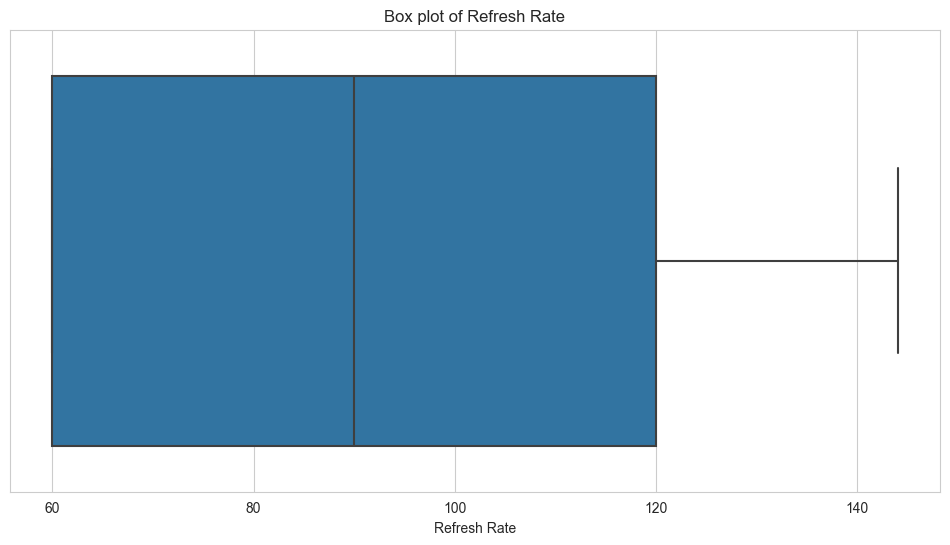

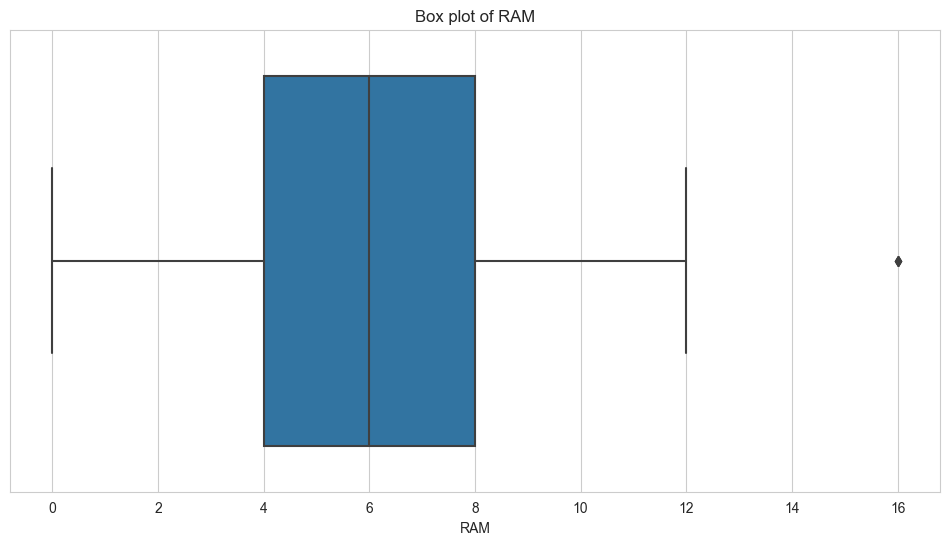

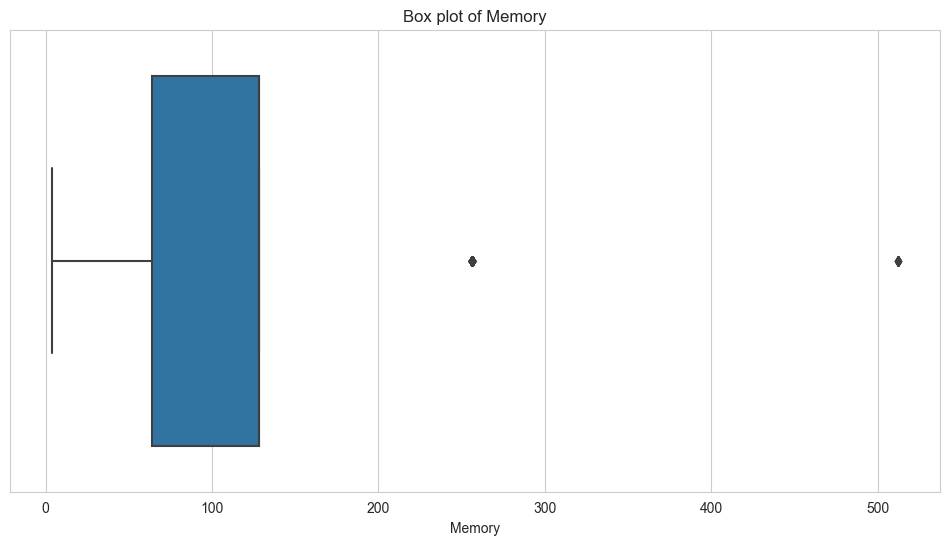

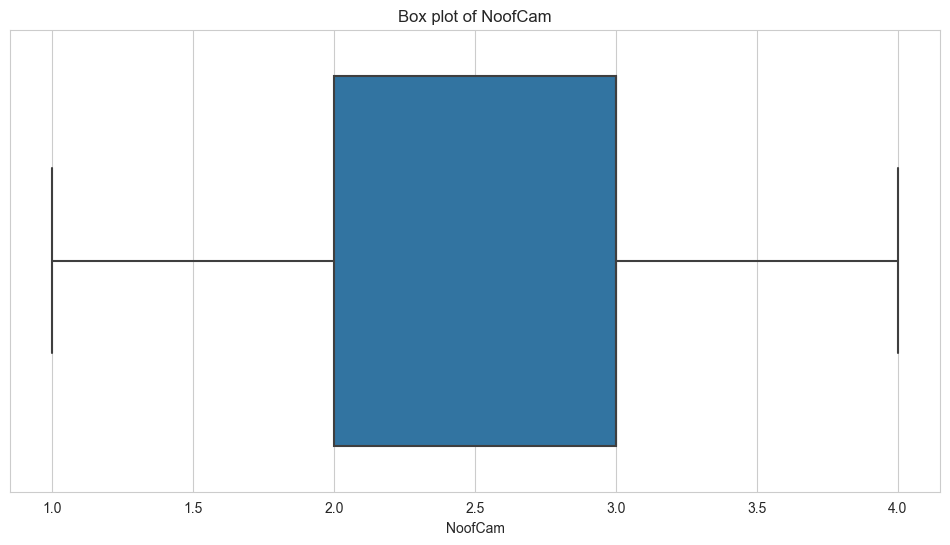

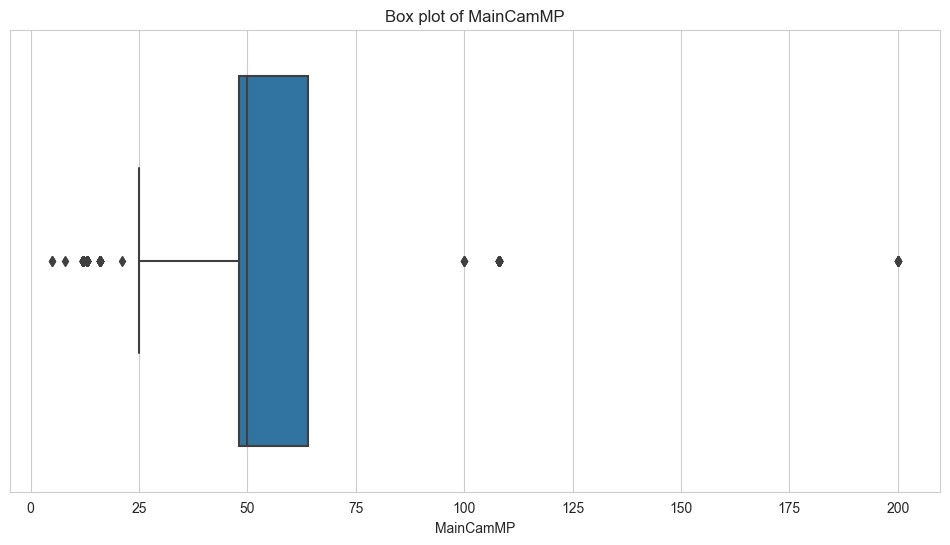

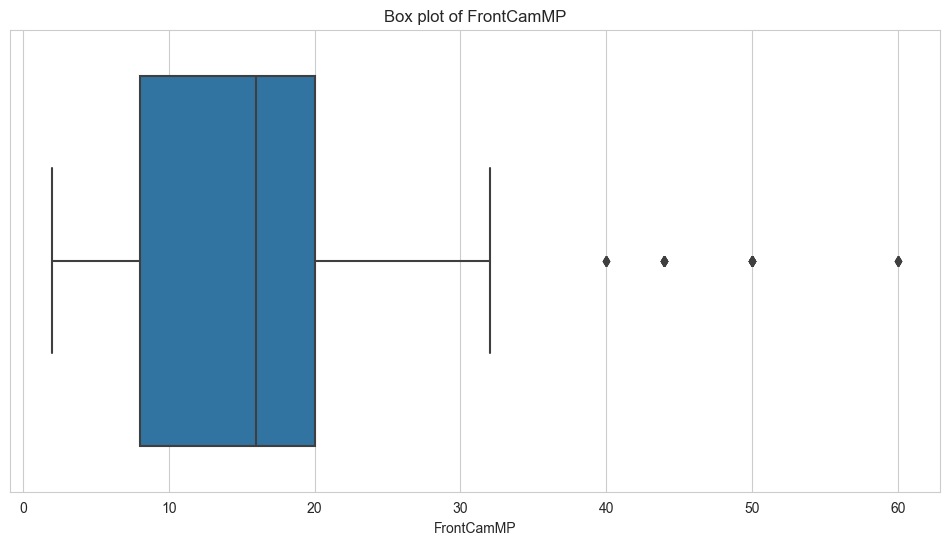

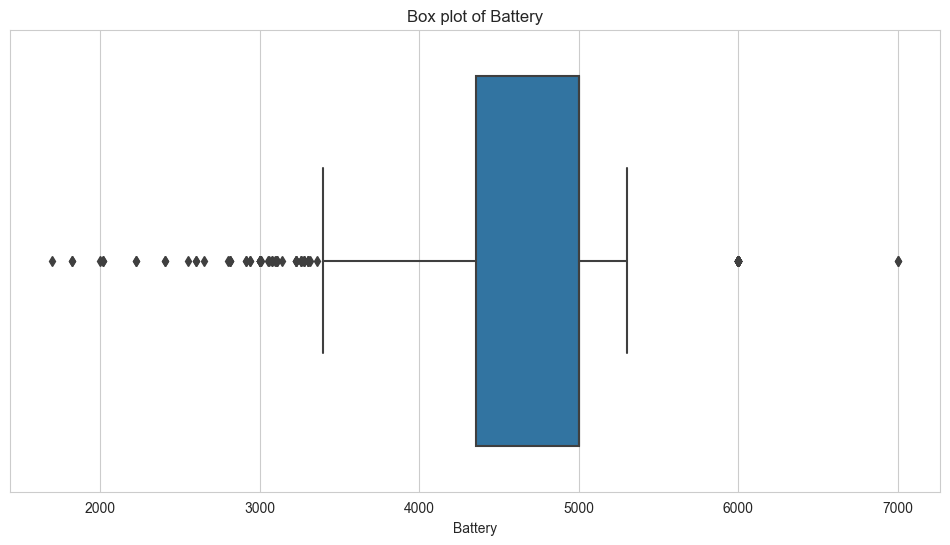

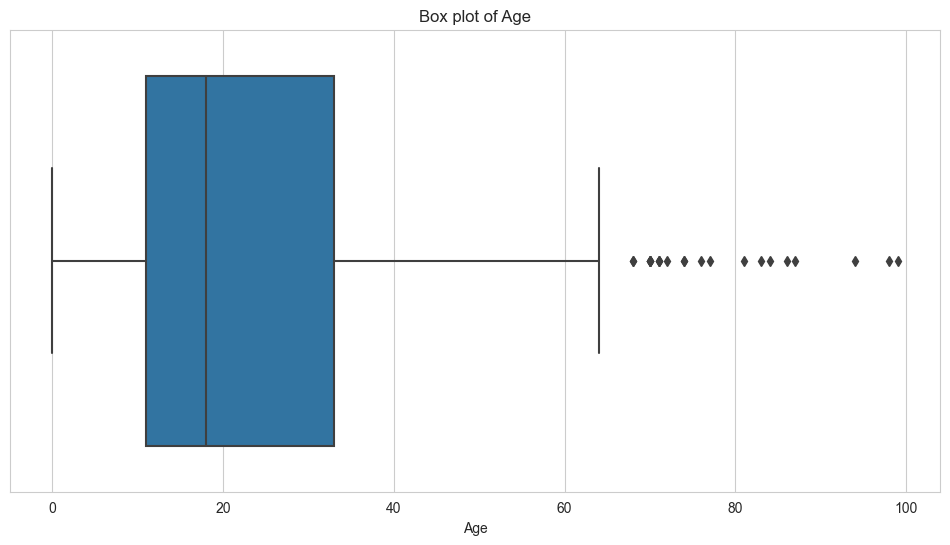

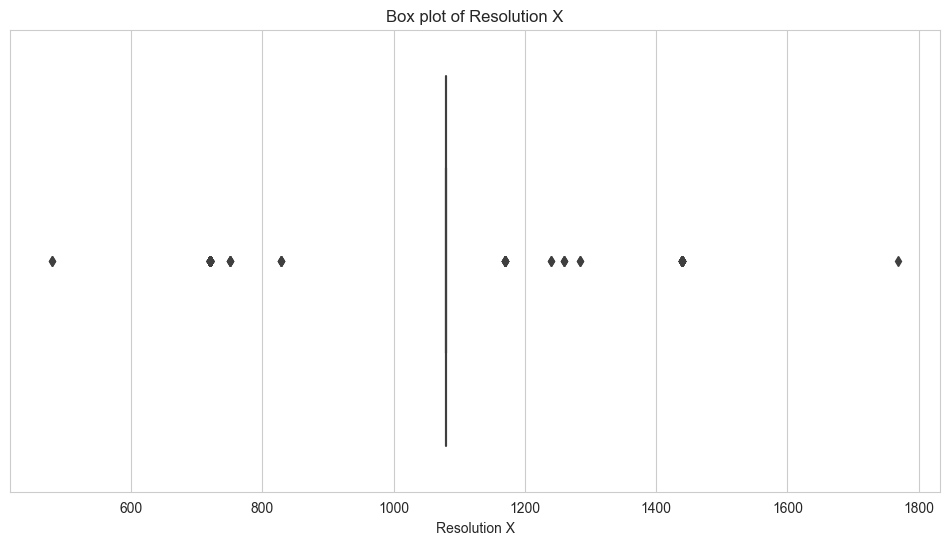

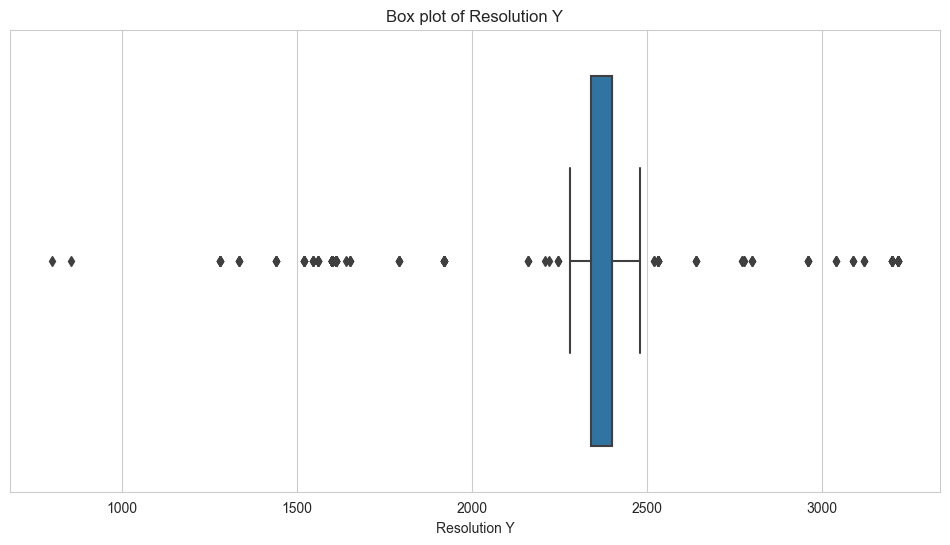

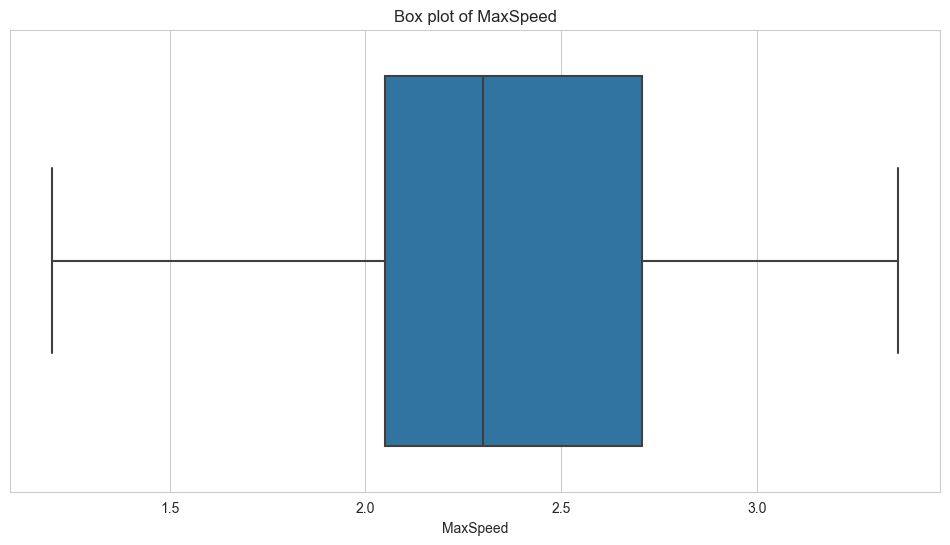

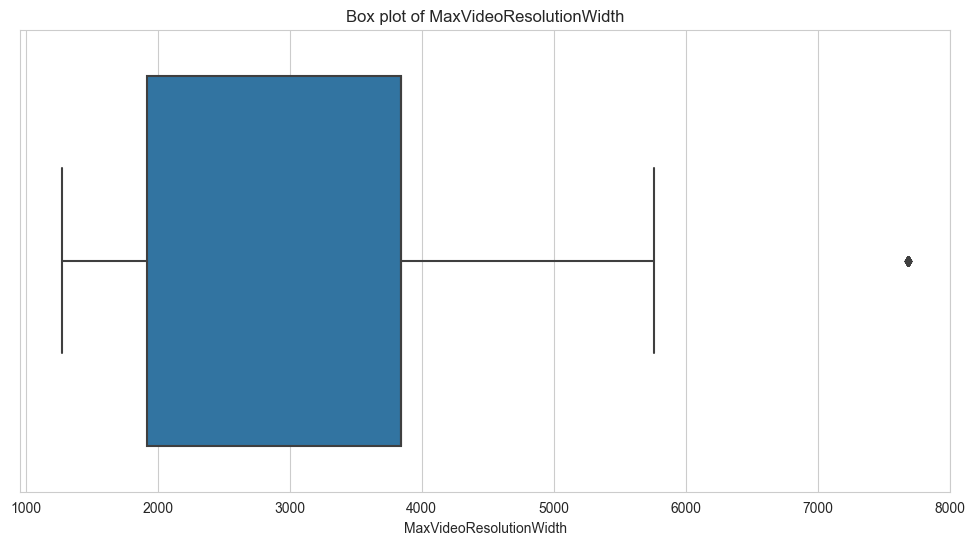

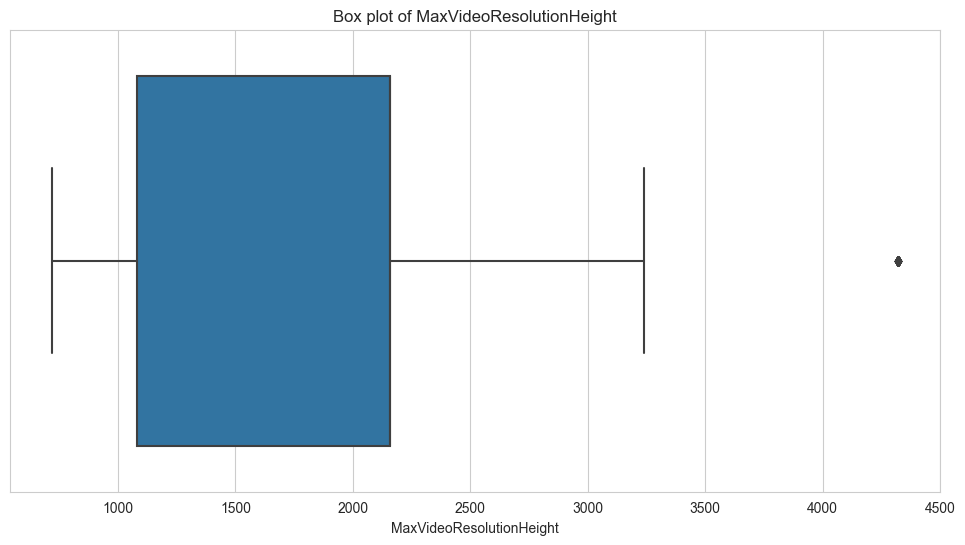

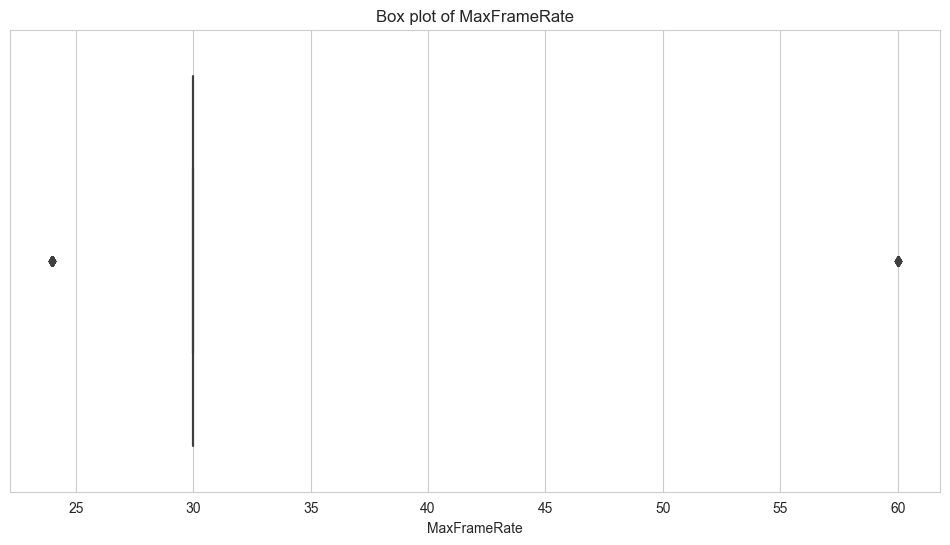

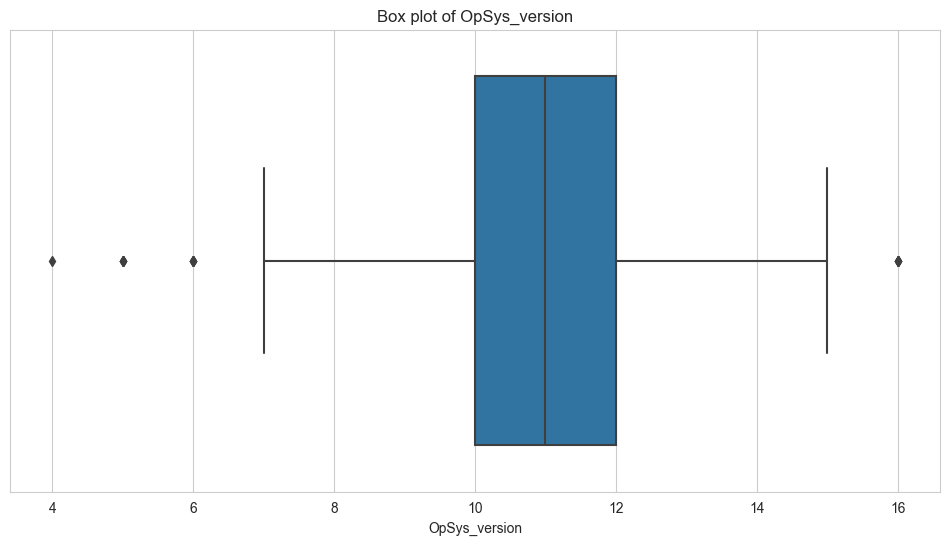

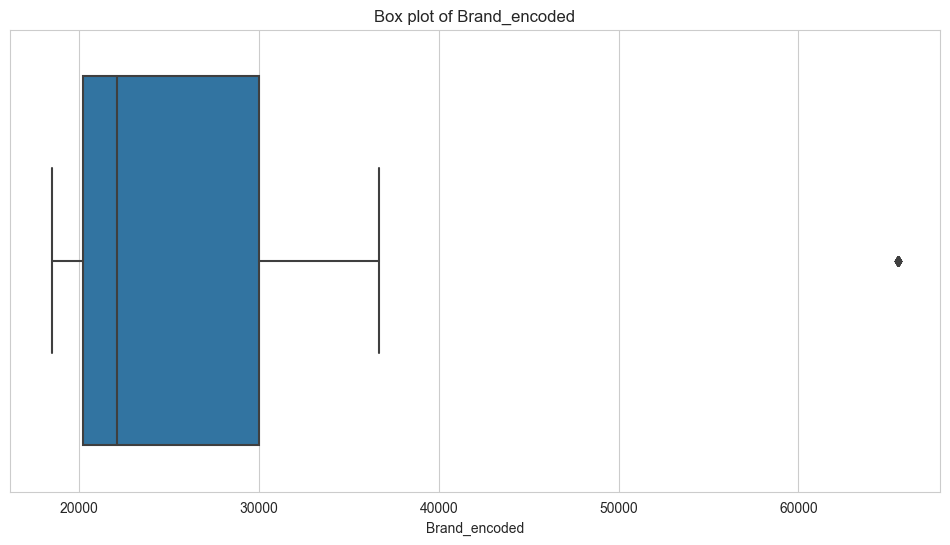

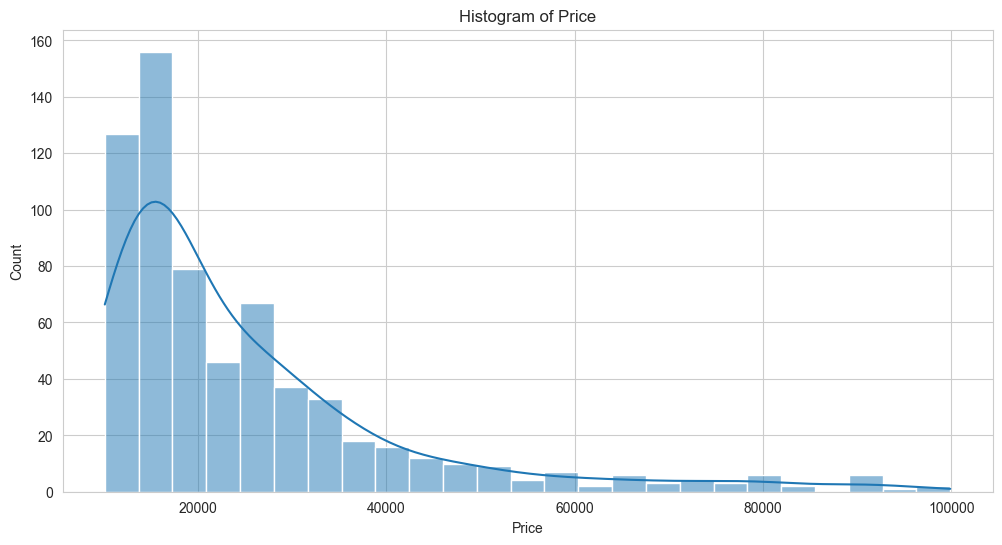

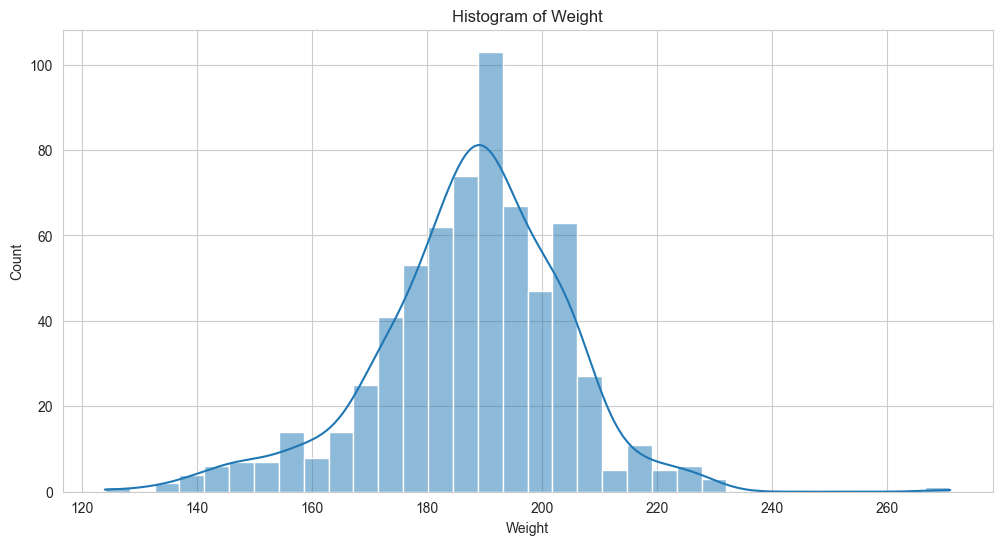

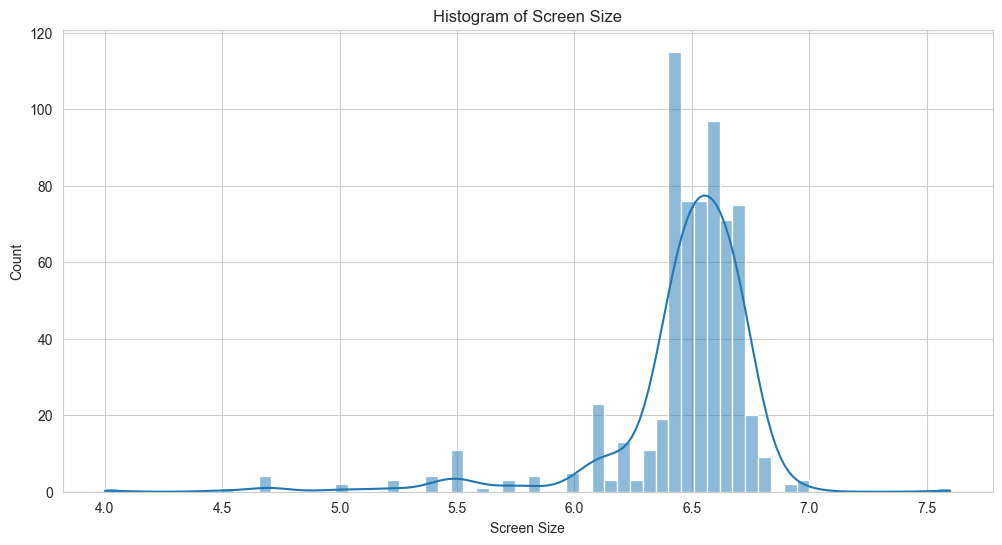

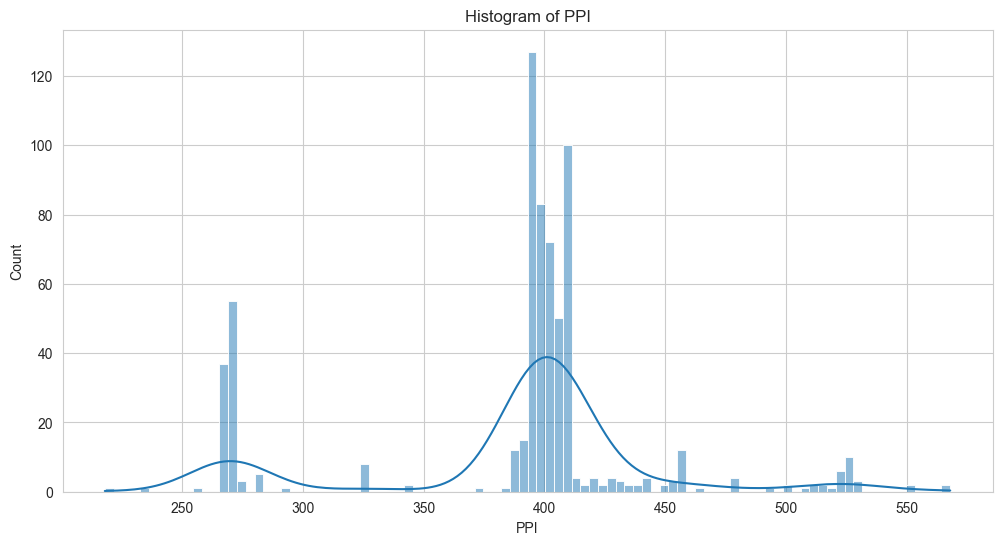

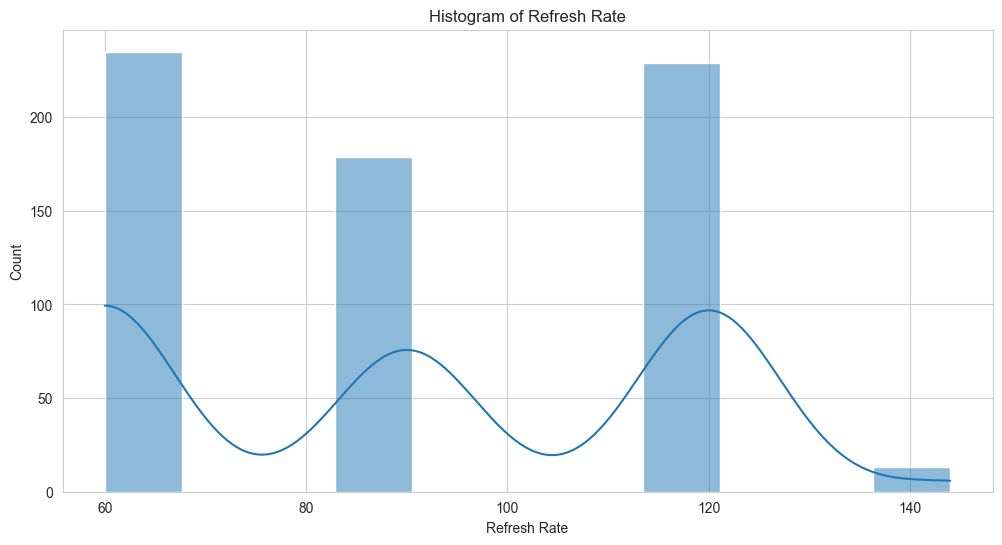

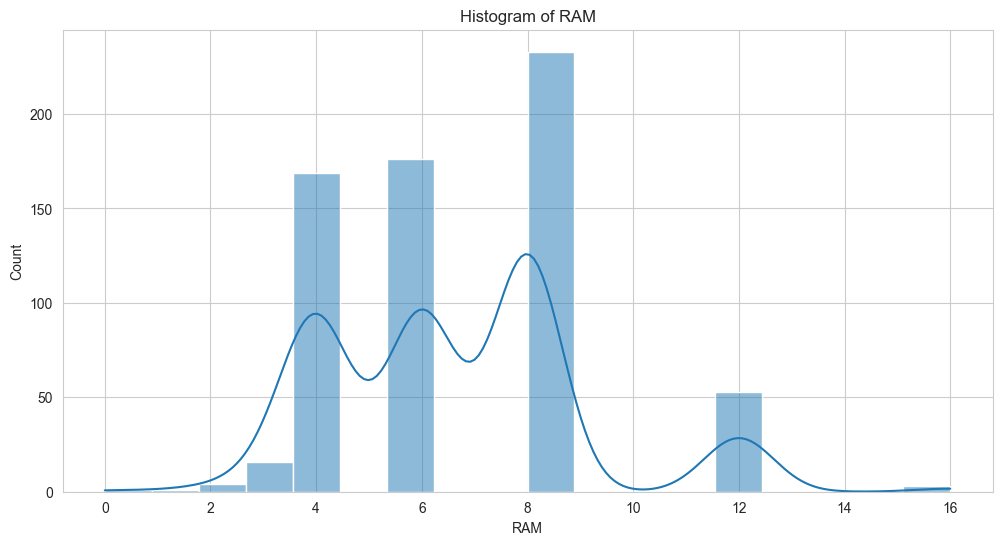

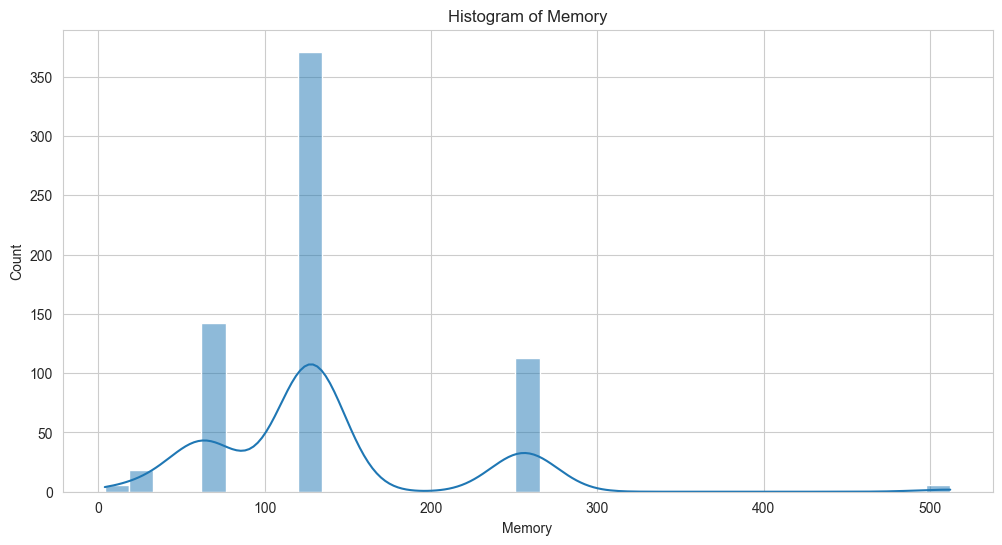

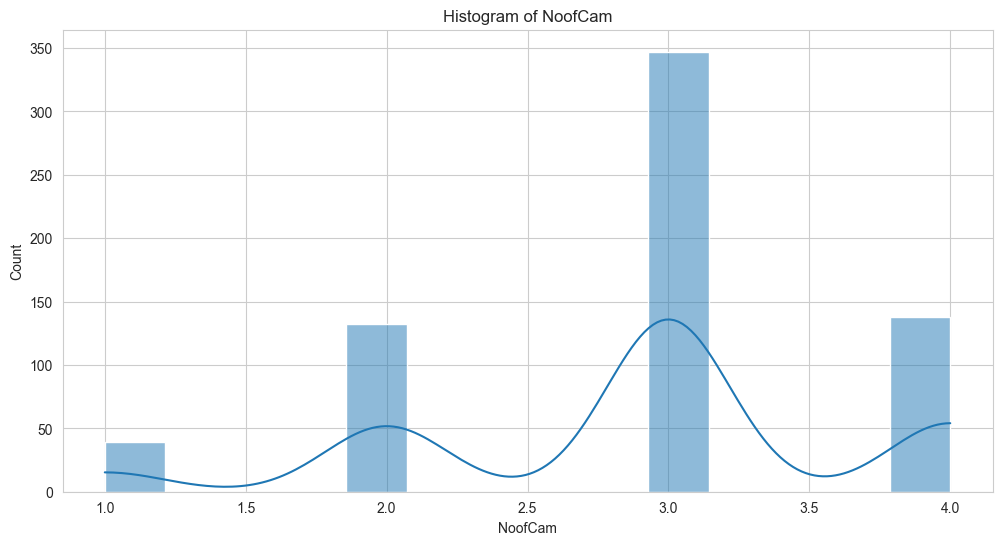

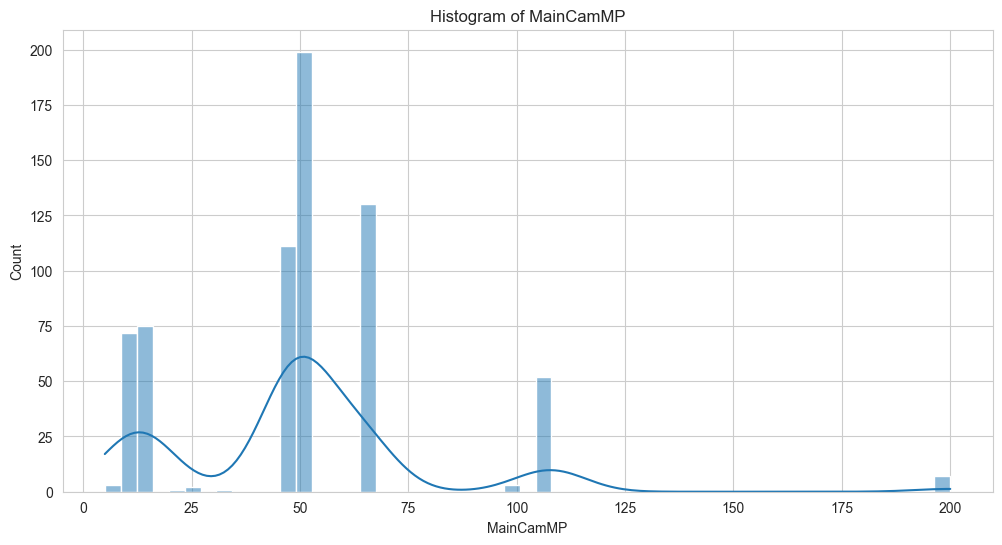

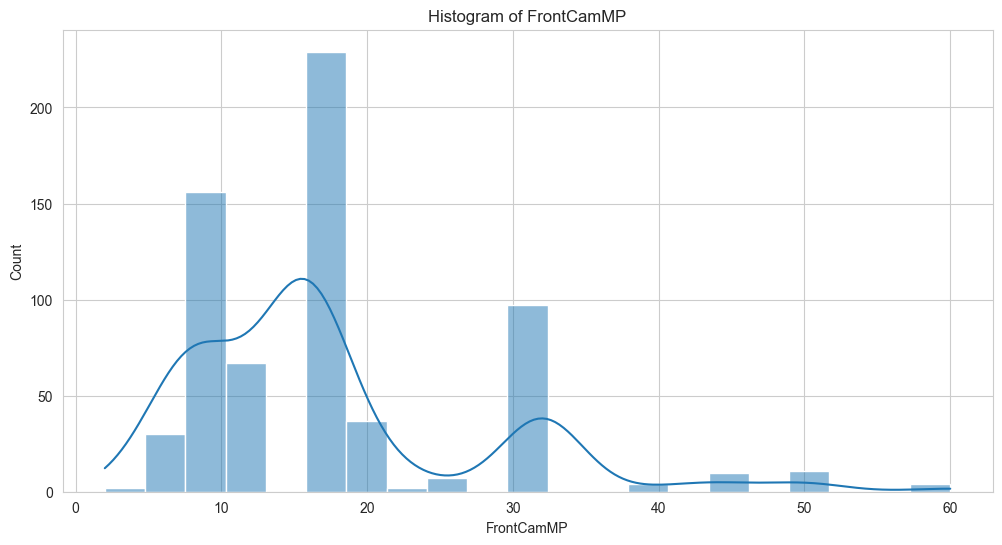

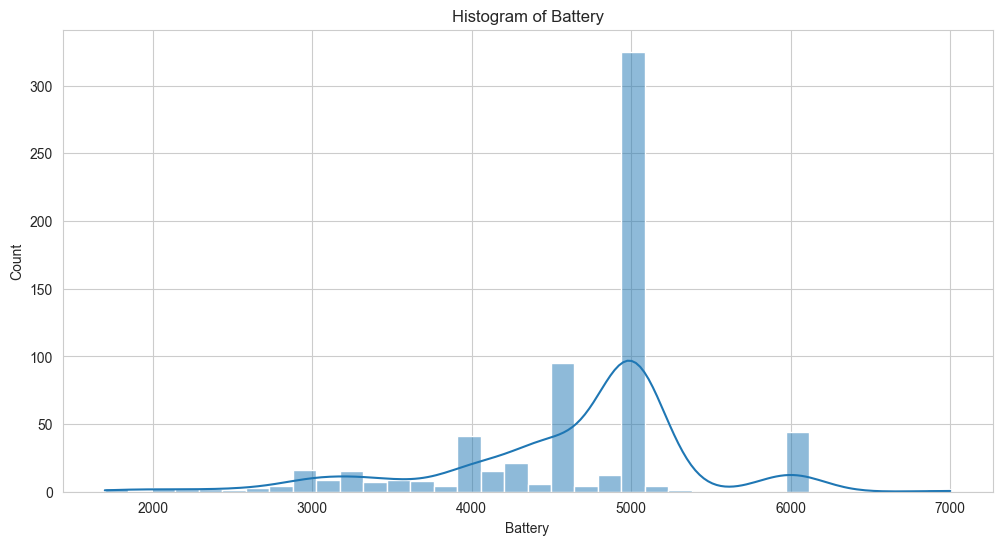

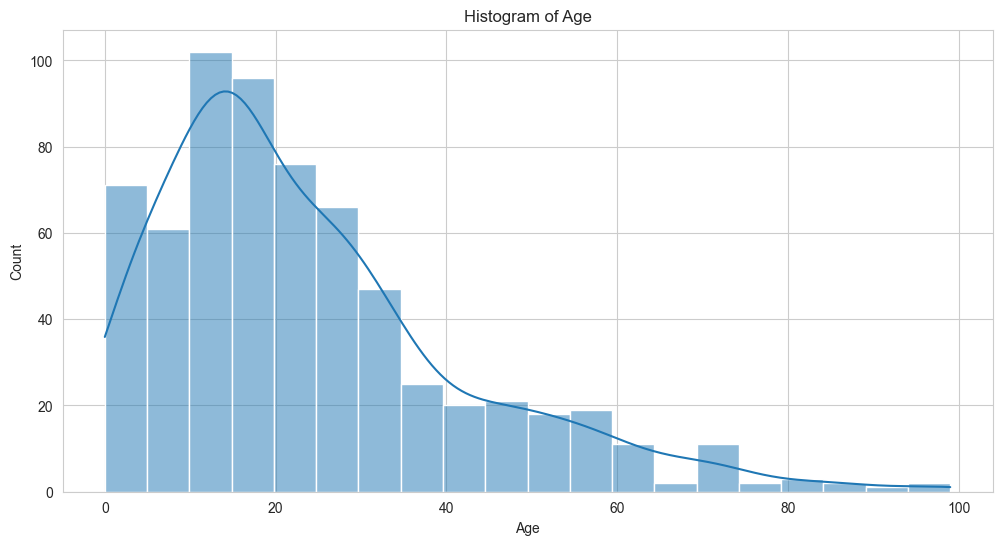

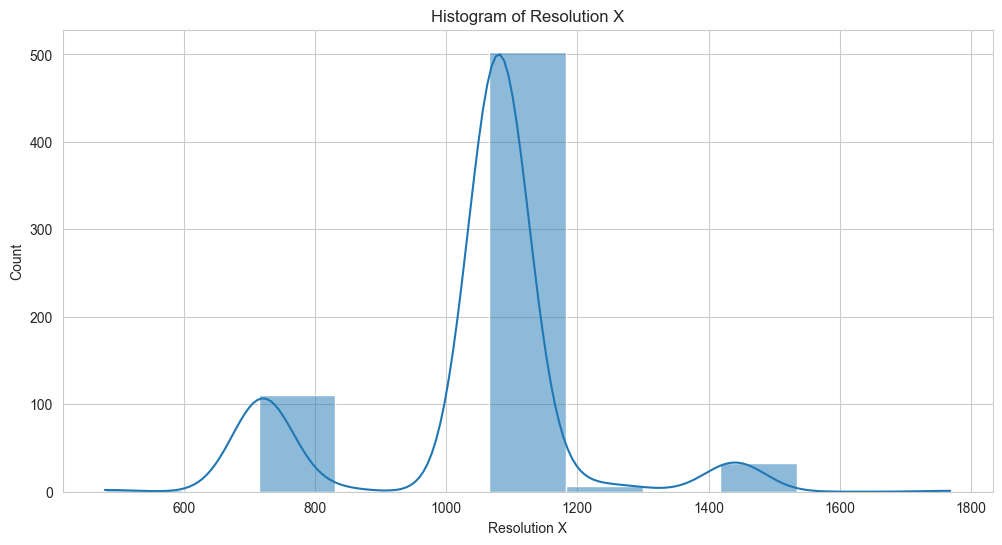

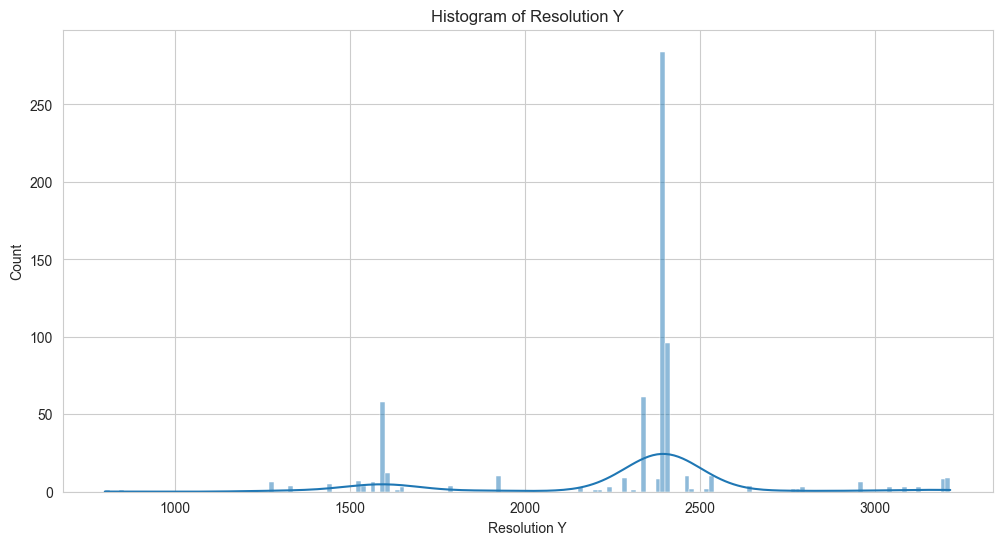

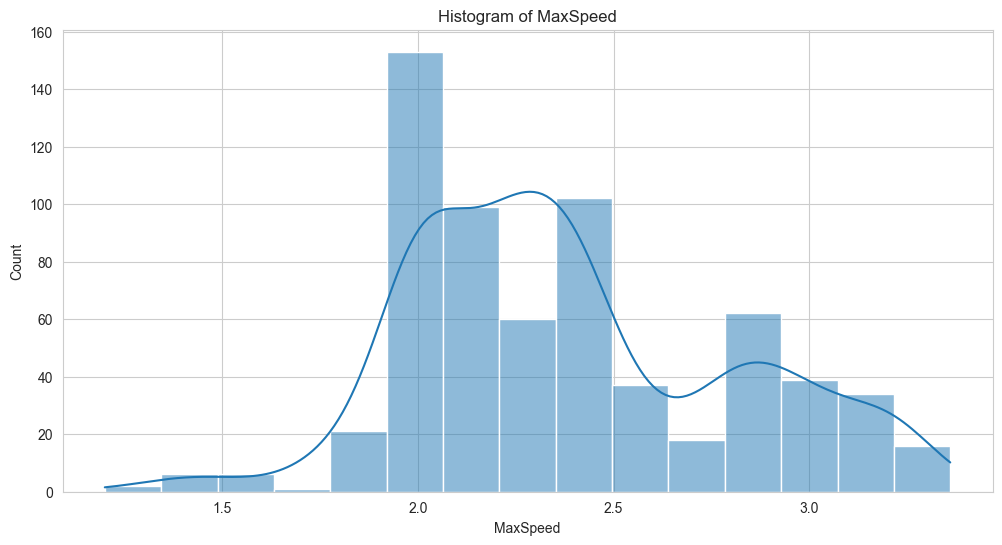

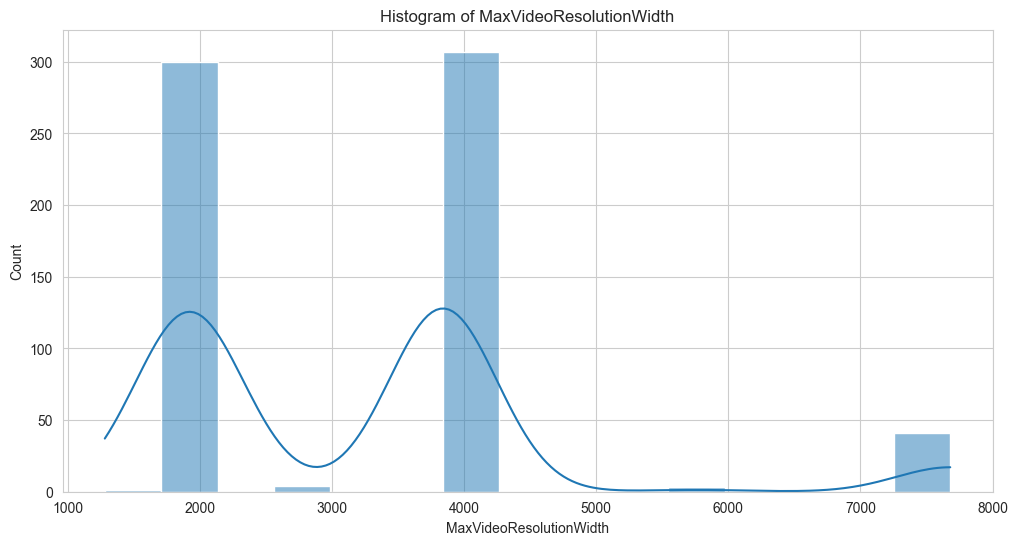

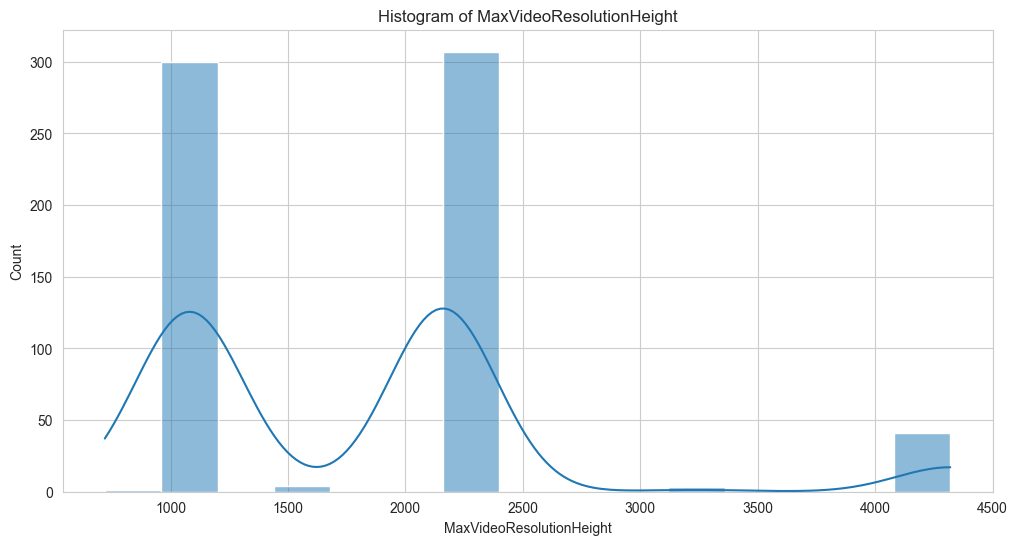

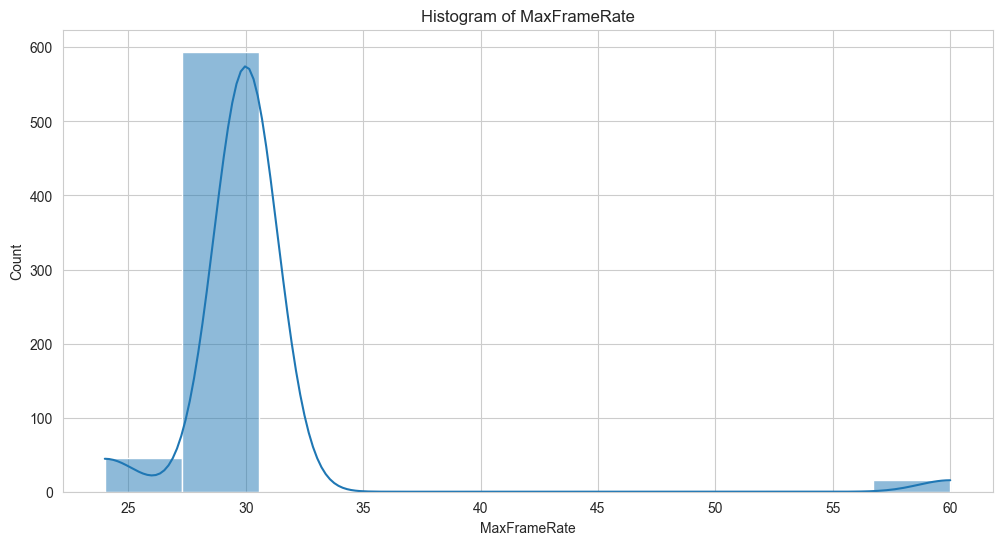

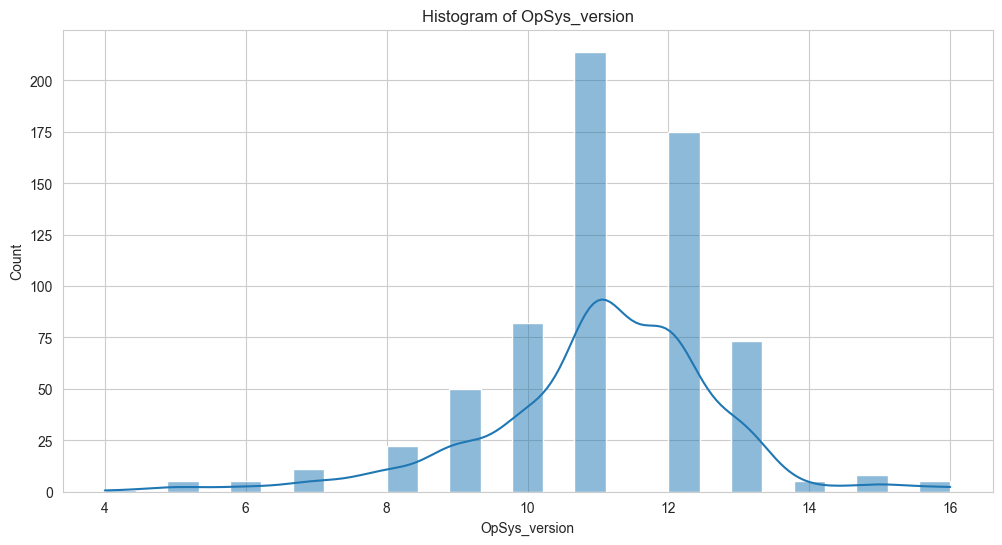

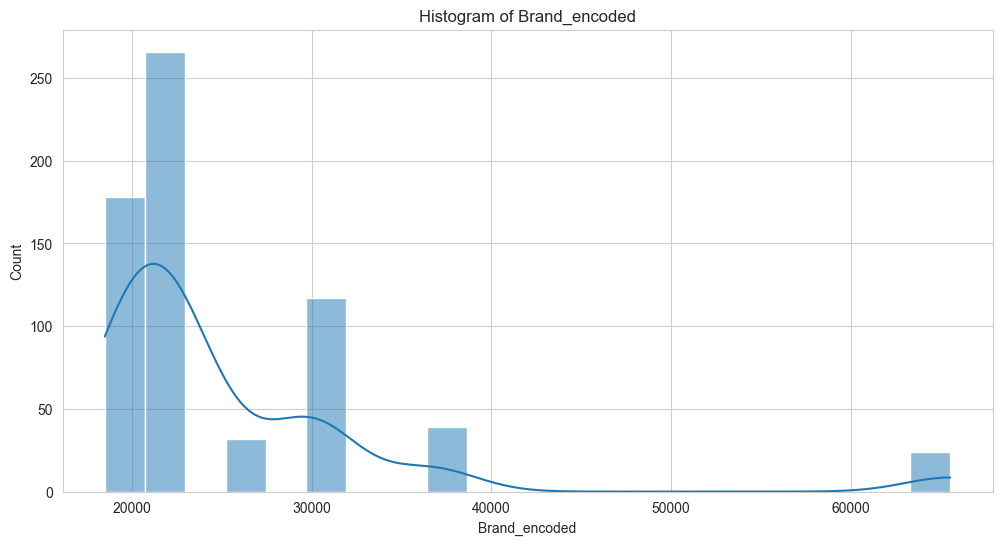

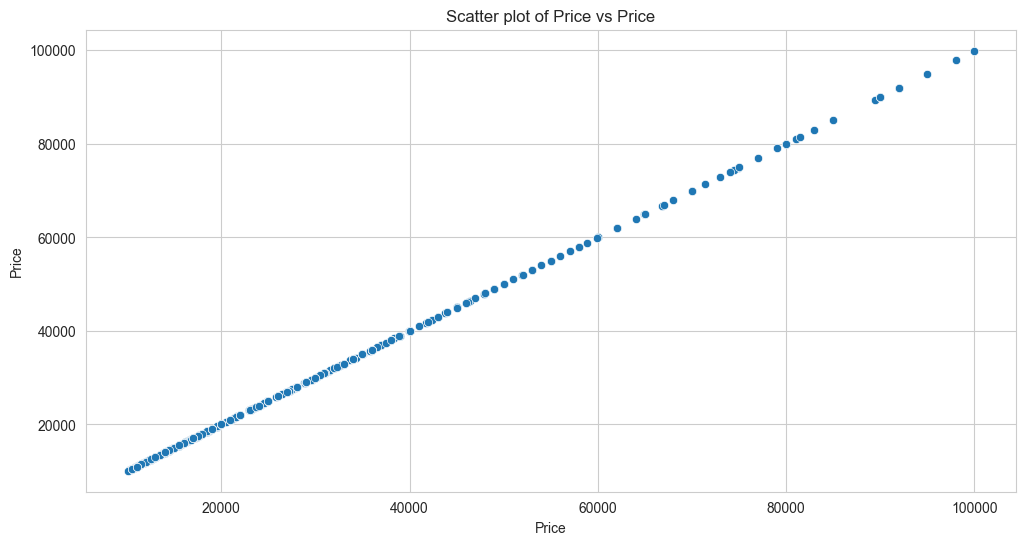

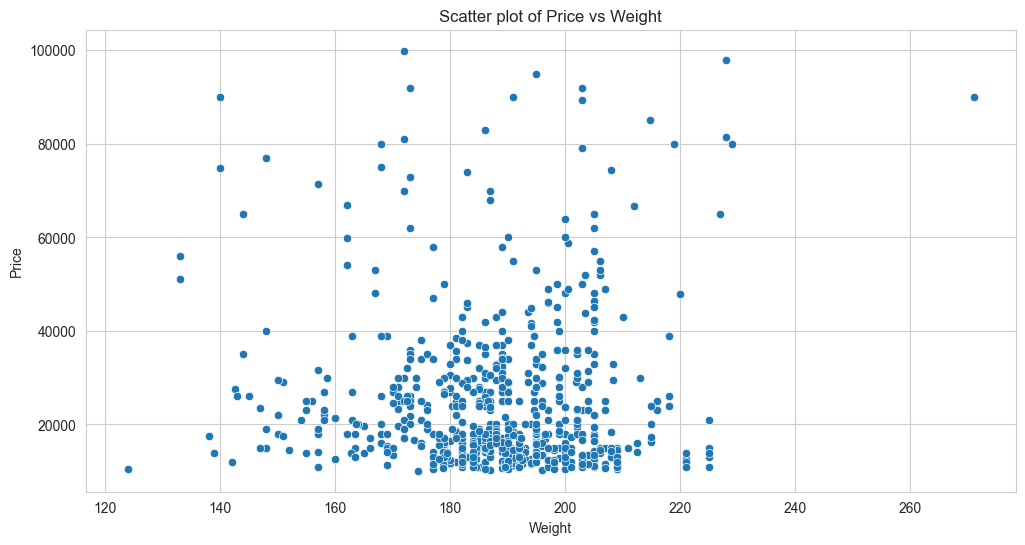

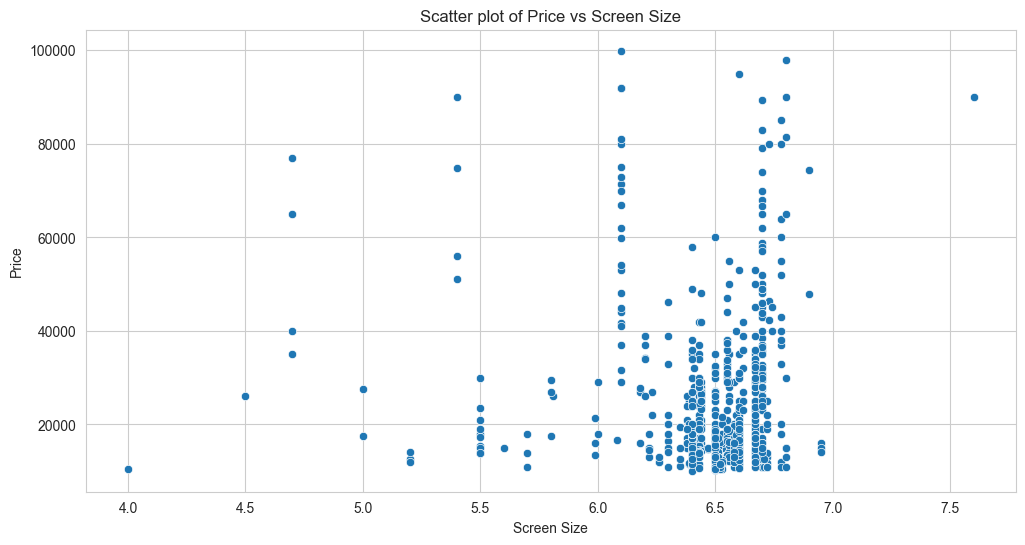

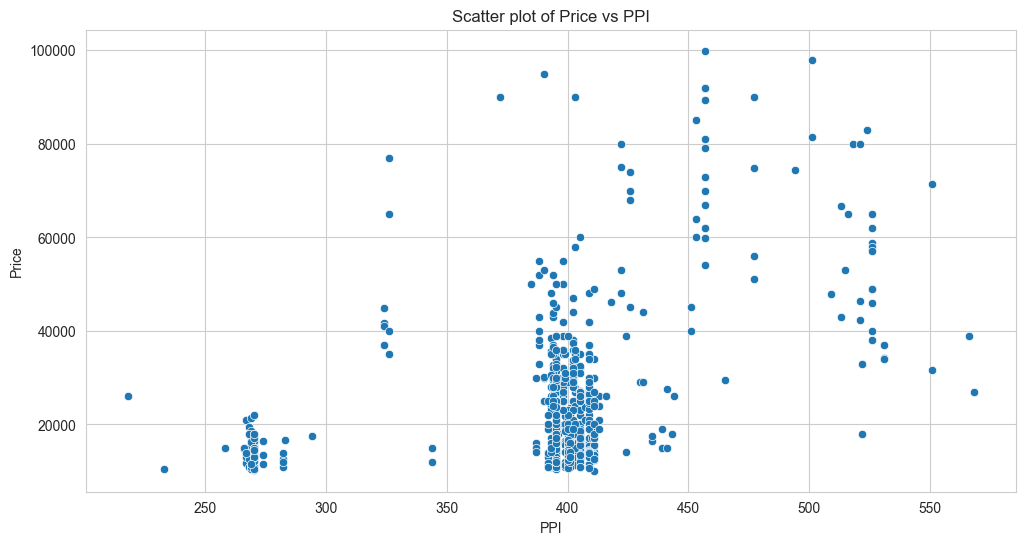

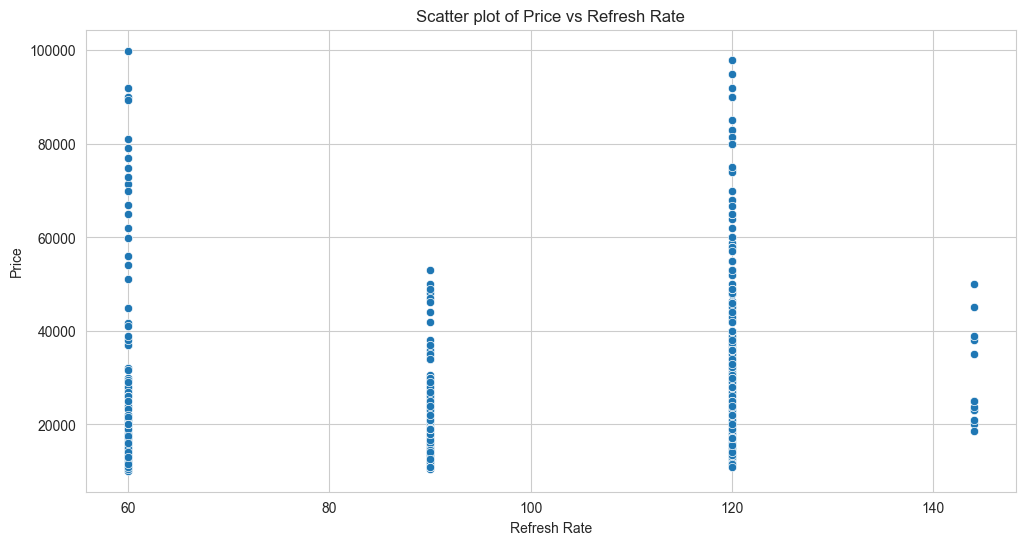

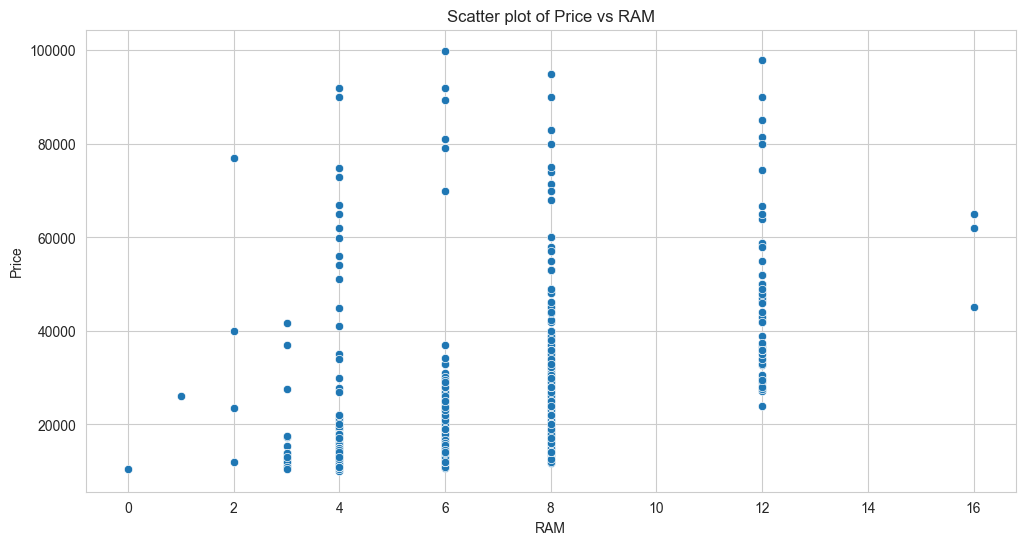

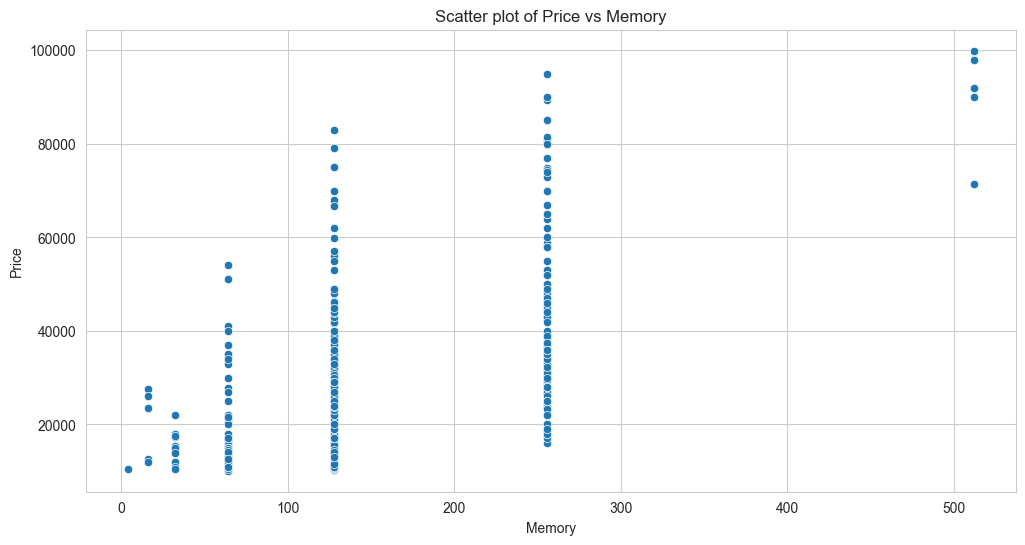

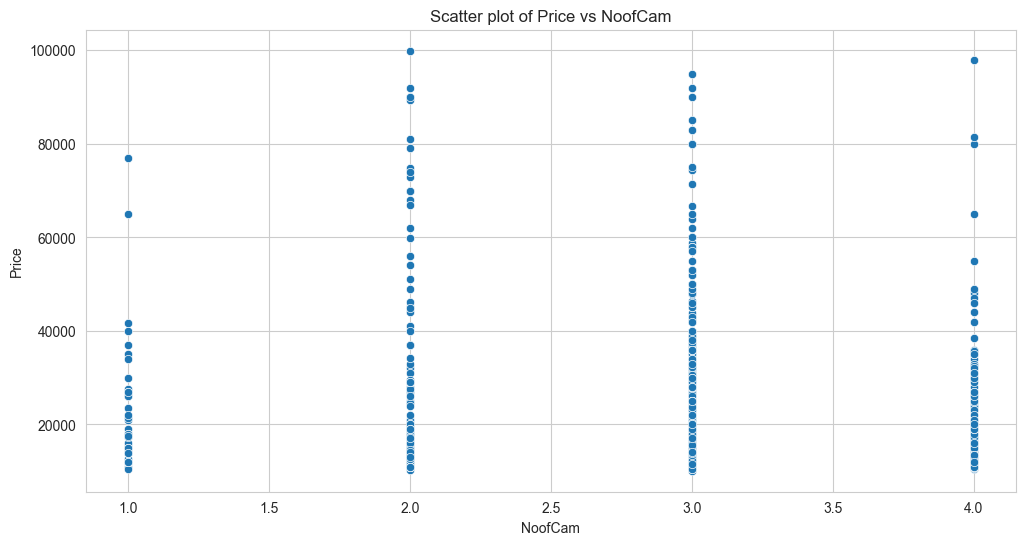

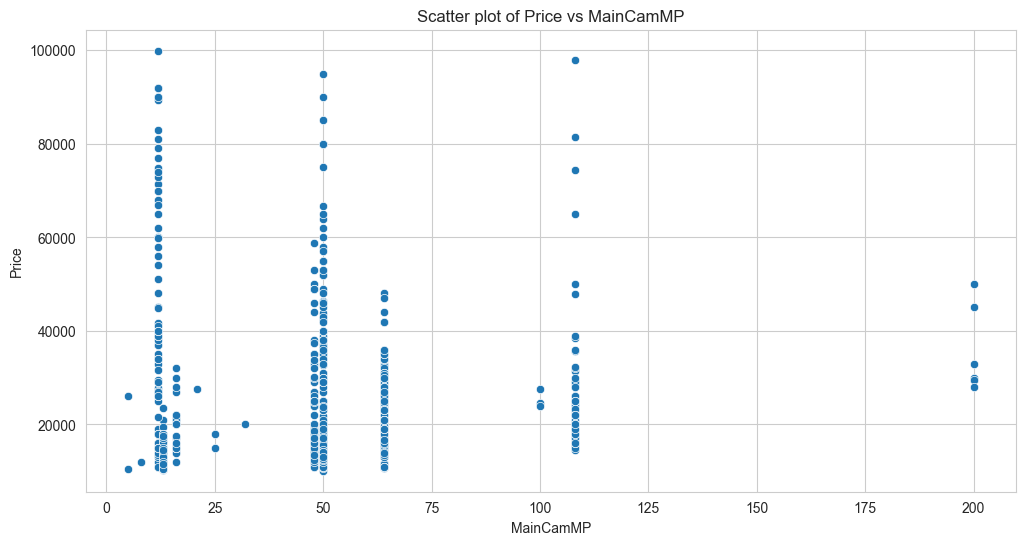

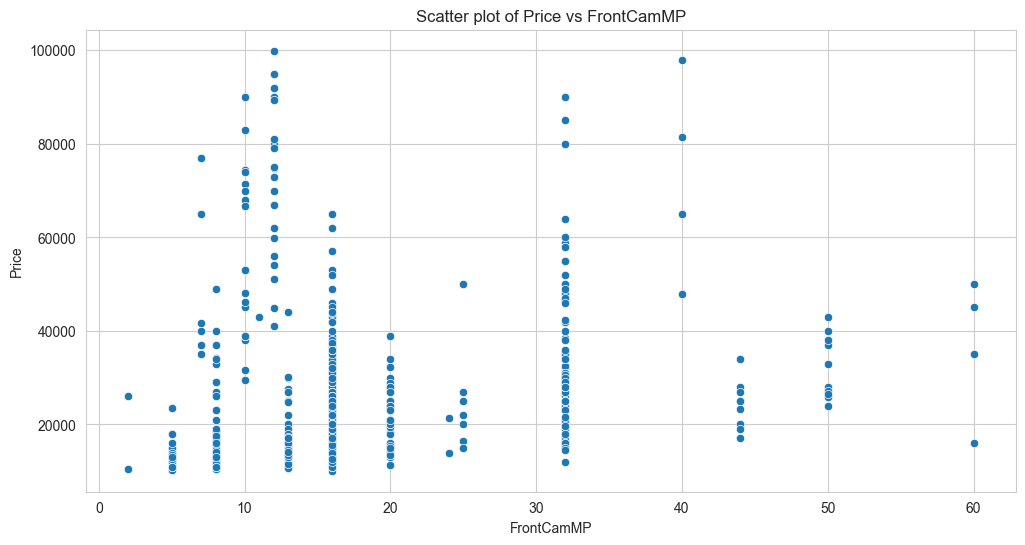

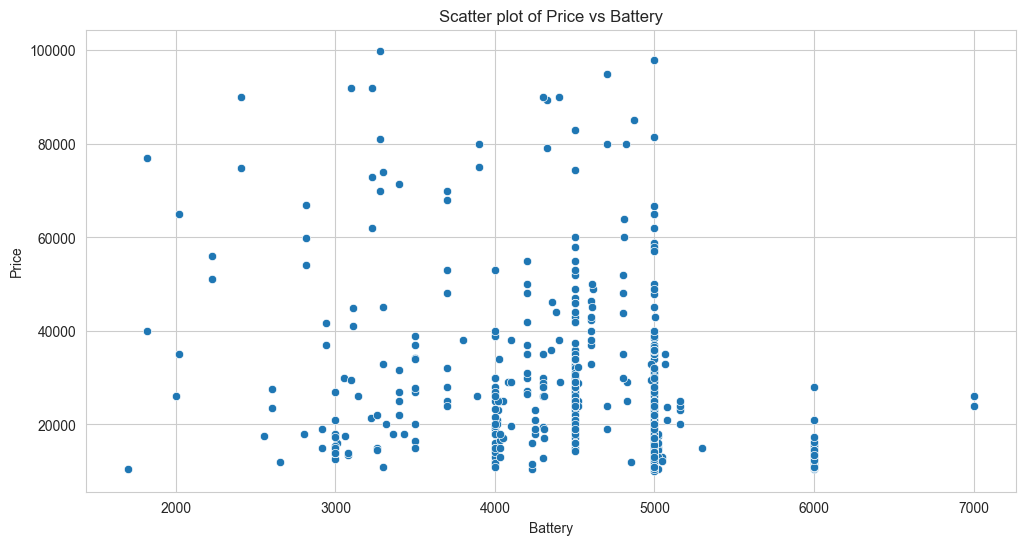

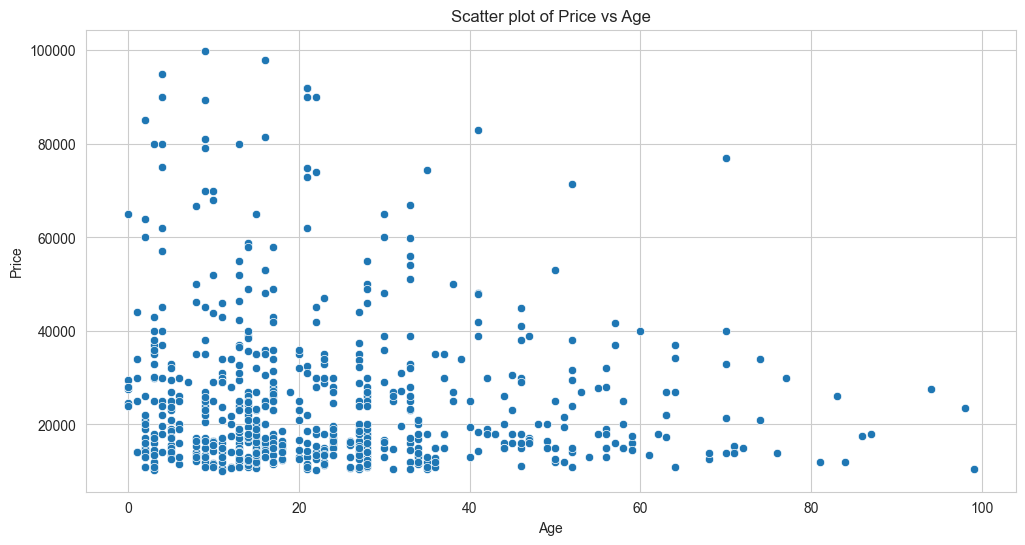

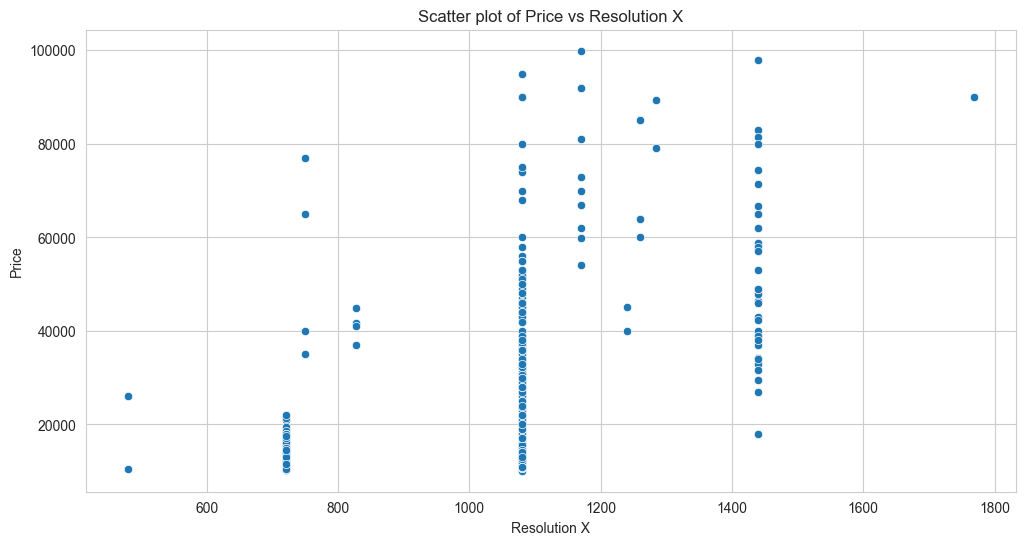

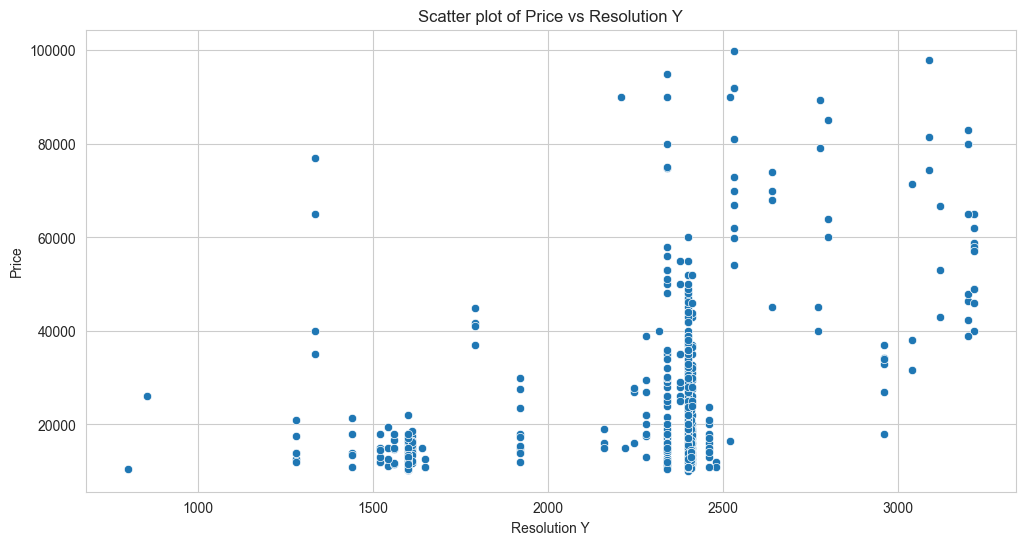

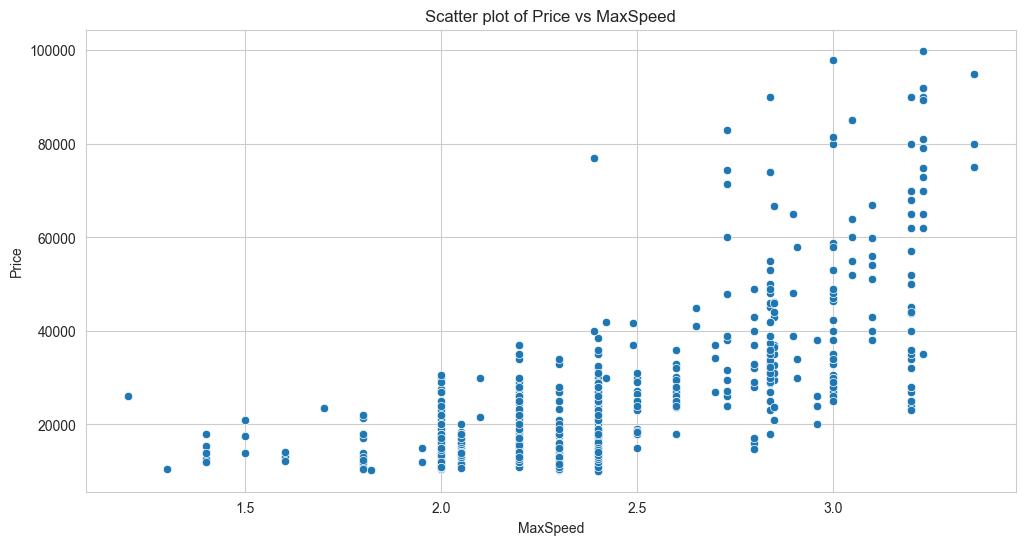

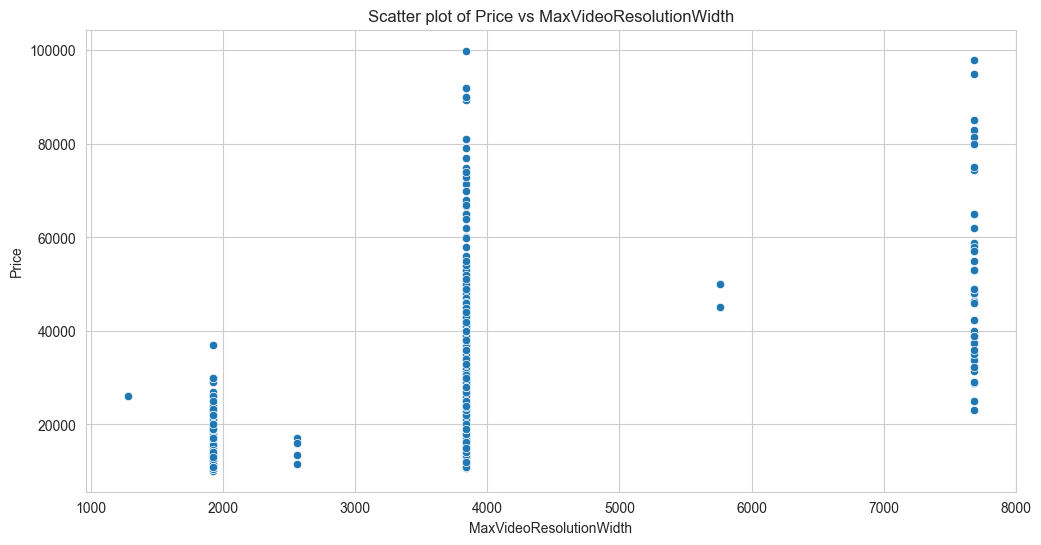

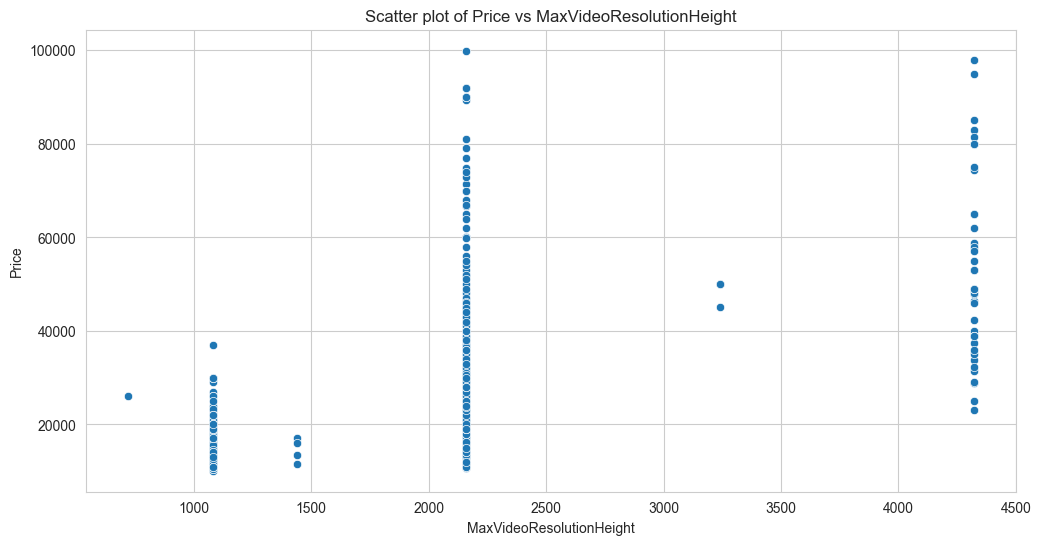

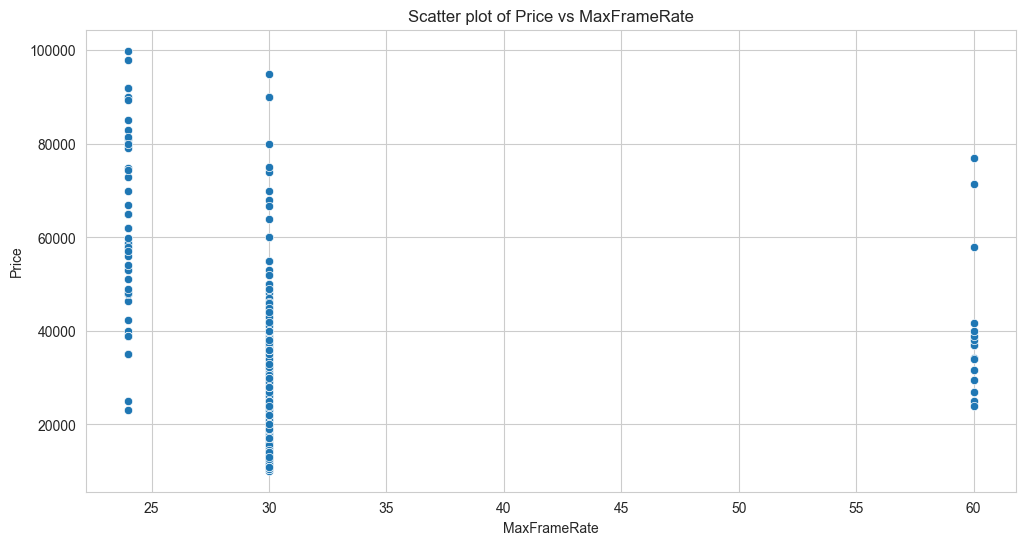

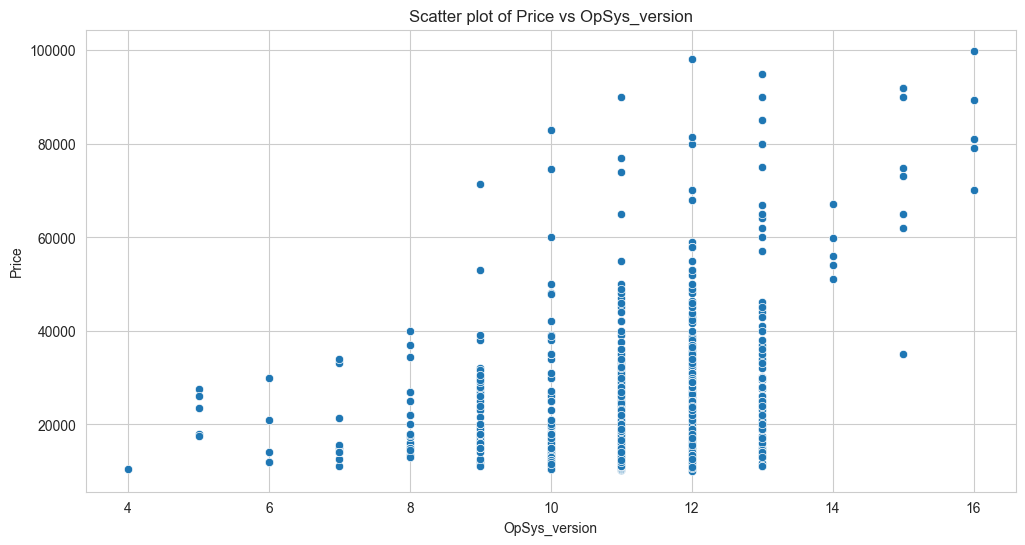

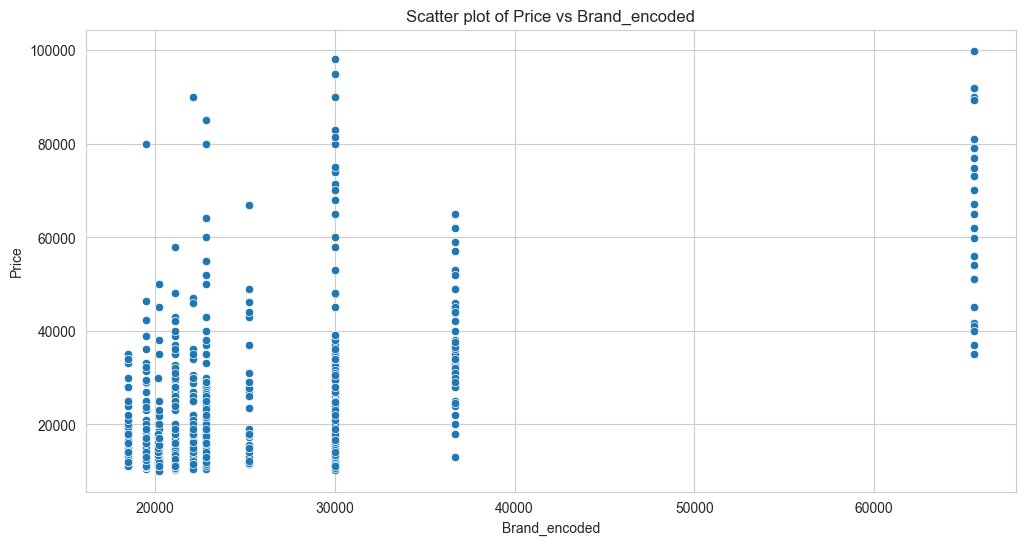

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#convert OpSys_version	ScreenType_LCD	ScreenType_OLED to int(binary)
df['OpSys_version'] = df['OpSys_version'].astype(int)
df['ScreenType_LCD'] = df['ScreenType_LCD'].astype(int)
df['ScreenType_OLED'] = df['ScreenType_OLED'].astype(int)


# List of numerical columns
num_cols = ['Price', 'Weight', 'Screen Size', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 
            'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 
            'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate', 
            'OpSys_version', 'Brand_encoded']

# Box plots for all numerical columns
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Histograms for all numerical columns     
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Scatter plots for all numerical columns against the target variable (Price)
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=col, y='Price')
    plt.title(f'Scatter plot of Price vs {col}')
    plt.show()


                             Price    Weight  Screen Size       PPI  \
Price                     1.000000  0.011240    -0.036386  0.470658   
Weight                    0.011240  1.000000     0.695269 -0.004416   
Screen Size              -0.036386  0.695269     1.000000  0.119429   
PPI                       0.470658 -0.004416     0.119429  1.000000   
Refresh Rate              0.332151  0.276152     0.346993  0.341513   
RAM                       0.474478  0.230315     0.415315  0.437912   
Memory                    0.653058  0.113831     0.195620  0.370452   
NoofCam                  -0.051493  0.442788     0.494164  0.104551   
MainCamMP                -0.016112  0.304651     0.446988  0.175378   
FrontCamMP                0.242973  0.013822     0.215027  0.274077   
Battery                  -0.359966  0.694896     0.723319 -0.131436   
Wireless Ch               0.678673 -0.090034    -0.245519  0.390543   
Fast Charging             0.183179  0.276235     0.361845  0.429108   
Finger

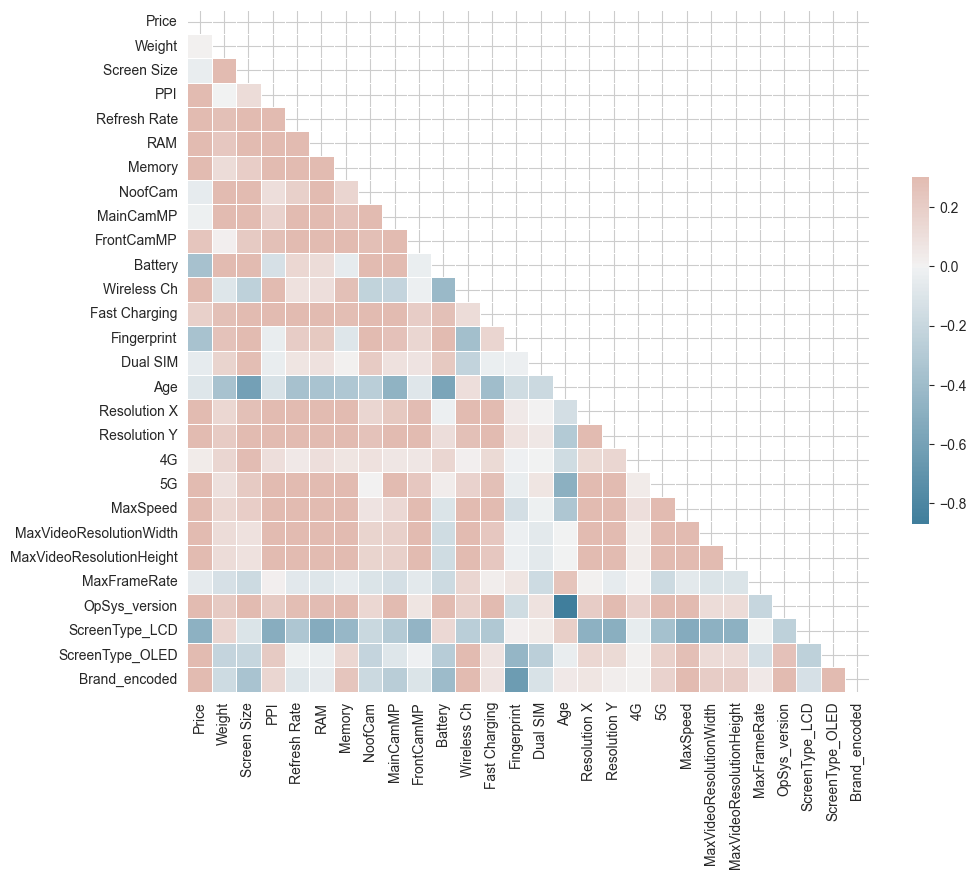

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [15]:
# print the distribution numerically for all columns with all values to study the distribution along with skewness and kurtosis and wether it is normal or not
for col in df.columns:
    print(f"Skewness of {col}: {df[col].skew()}")
    print(f"Kurtosis of {col}: {df[col].kurtosis()}")
    print(f"Normal distribution of {col}: {df[col].kurtosis() < 3 and df[col].skew() < 3 and df[col].skew() > -3}")
    print(f"Unique values in {col}: {df[col].unique()}")
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Skewness of Price: 2.072513783836758
Kurtosis of Price: 4.549737789363876
Normal distribution of Price: False
Unique values in Price: [13990 14990 10758 13999 17999 10999 18390 91999 23499 18000 41999 15990
 11999 34000 12499 27590 10500 15000 18999 12000 17200 14999 15499 89999
 64900 21000 31999 12990 26999 16490 11189 18450 11499 13499 59999 11699
 10294 36999 15999 19999 74900 22999 31480 77000 26990 15465 14690 34999
 14499 12999 25999 29999 19499 27000 27990 24990 10499 12489 24999 13899
 30000 71400 15490 16499 10199 16599 17271 41699 19994 14899 13000 38959
 47999 55999 12649 51990 27779 16799 15495 18619 16990 21300 17990 25000
 52999 34990 27994 16249 10990 19990 42999 14180 14299 21990 11485 29990
 16999 10400 14209 72999 15480 27249 13090 27999 15998 52990 29600 16294
 12500 21699 29000 19600 33000 16699 11680 32999 63999 12900 49999 17494
 28799 19500 97999 17600 32499 46390 20990 27499 58889 11399 51999 18499
 22987 17499 33999 23994 23999 35090 28994 28980 11094 14994 21

In [16]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Assuming df is your DataFrame and columns is a list of your column names
columns = ['Price', 'Weight', 'Screen Size', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate', 'OpSys_version', 'Brand_encoded']

# Winsorizing
for col in columns:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Log transformation for right-skewed columns
right_skewed = ['Price', 'Weight', 'PPI', 'Refresh Rate', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age', 'Resolution X', 'Resolution Y', 'MaxSpeed', 'MaxVideoResolutionWidth', 'MaxVideoResolutionHeight', 'MaxFrameRate']
for col in right_skewed:
    df[col] = df[col].apply(lambda x: np.log(x+1))

# Square transformation for left-skewed columns
left_skewed = ['Screen Size']
for col in left_skewed:
    df[col] = df[col].apply(np.square)

# Scaling
scaler = StandardScaler()  # or MinMaxScaler(), depending on your needs
df[columns] = scaler.fit_transform(df[columns])

# Normalization with Box-Cox
normalizer = PowerTransformer(method='box-cox')
for col in ['Price', 'Weight', 'RAM', 'Memory', 'NoofCam', 'MainCamMP', 'FrontCamMP', 'Battery', 'Age']:
    min_val = df[col].min()
    if min_val <= 0:
        df[col] = df[col] + abs(min_val) + 1  # make all values strictly positive
    df[col] = normalizer.fit_transform(df[[col]])

# Binary columns
binary_cols = ['Wireless Ch', 'Fast Charging', 'Fingerprint', 'Dual SIM', '4G', '5G', 'ScreenType_LCD', 'ScreenType_OLED']
# No transformation is needed for binary columns


In [17]:
# print 5 random rows from the dataframe
df.sample(5)

#generate a new csv file with the cleaned data
df.to_csv('cleaned_phonedata.csv', index=False)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Test the function with some example data
y_true_example = [3, -0.5, 2, 7]
y_pred_example = [2.5, 0.0, 2, 8]
mse_example, mae_example, r2_example = evaluate_model(y_true_example, y_pred_example)

print(f"Mean Squared Error: {mse_example}")
print(f"Mean Absolute Error: {mae_example}")
print(f"R-squared: {r2_example}")


Mean Squared Error: 0.375
Mean Absolute Error: 0.5
R-squared: 0.9486081370449679


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Calculate the IQR of your data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for what constitutes an outlier
threshold = 1.5

# Create a binary variable indicating whether each data point is an outlier
is_outlier = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in sss.split(df, is_outlier):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]


Training Linear Regression...
Linear Regression Metrics:
Mean Squared Error (MSE): 0.15026370929542557
Root Mean Squared Error (RMSE): 0.38763863235676804
Mean Absolute Error (MAE): 0.3063758844216364
R-squared (R2 ): 0.848260700020663


Training SVR...


c:\Users\Shreyansh Rai\Projects\INTEL\venv\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVR Metrics:
Mean Squared Error (MSE): 0.12840323300453346
Root Mean Squared Error (RMSE): 0.35833396853289456
Mean Absolute Error (MAE): 0.2723278885457634
R-squared (R2 ): 0.870335846342742


Training Decision Tree...
Decision Tree Metrics:
Mean Squared Error (MSE): 0.21195432725033753
Root Mean Squared Error (RMSE): 0.4603849772205187
Mean Absolute Error (MAE): 0.3513193860629682
R-squared (R2 ): 0.7859642797628141


Training Random Forest...
Random Forest Metrics:
Mean Squared Error (MSE): 0.15679181906287928
Root Mean Squared Error (RMSE): 0.39596946733666133
Mean Absolute Error (MAE): 0.29528015093086746
R-squared (R2 ): 0.8416684841693014


Training Gradient Boosting...
Gradient Boosting Metrics:
Mean Squared Error (MSE): 0.12287137022627184
Root Mean Squared Error (RMSE): 0.3505301274159924
Mean Absolute Error (MAE): 0.2654795471185694
R-squared (R2 ): 0.8759220320524589


Training XGBoost...
XGBoost Metrics:
Mean Squared Error (MSE): 0.11388243917609256
Root Mean Squared Error

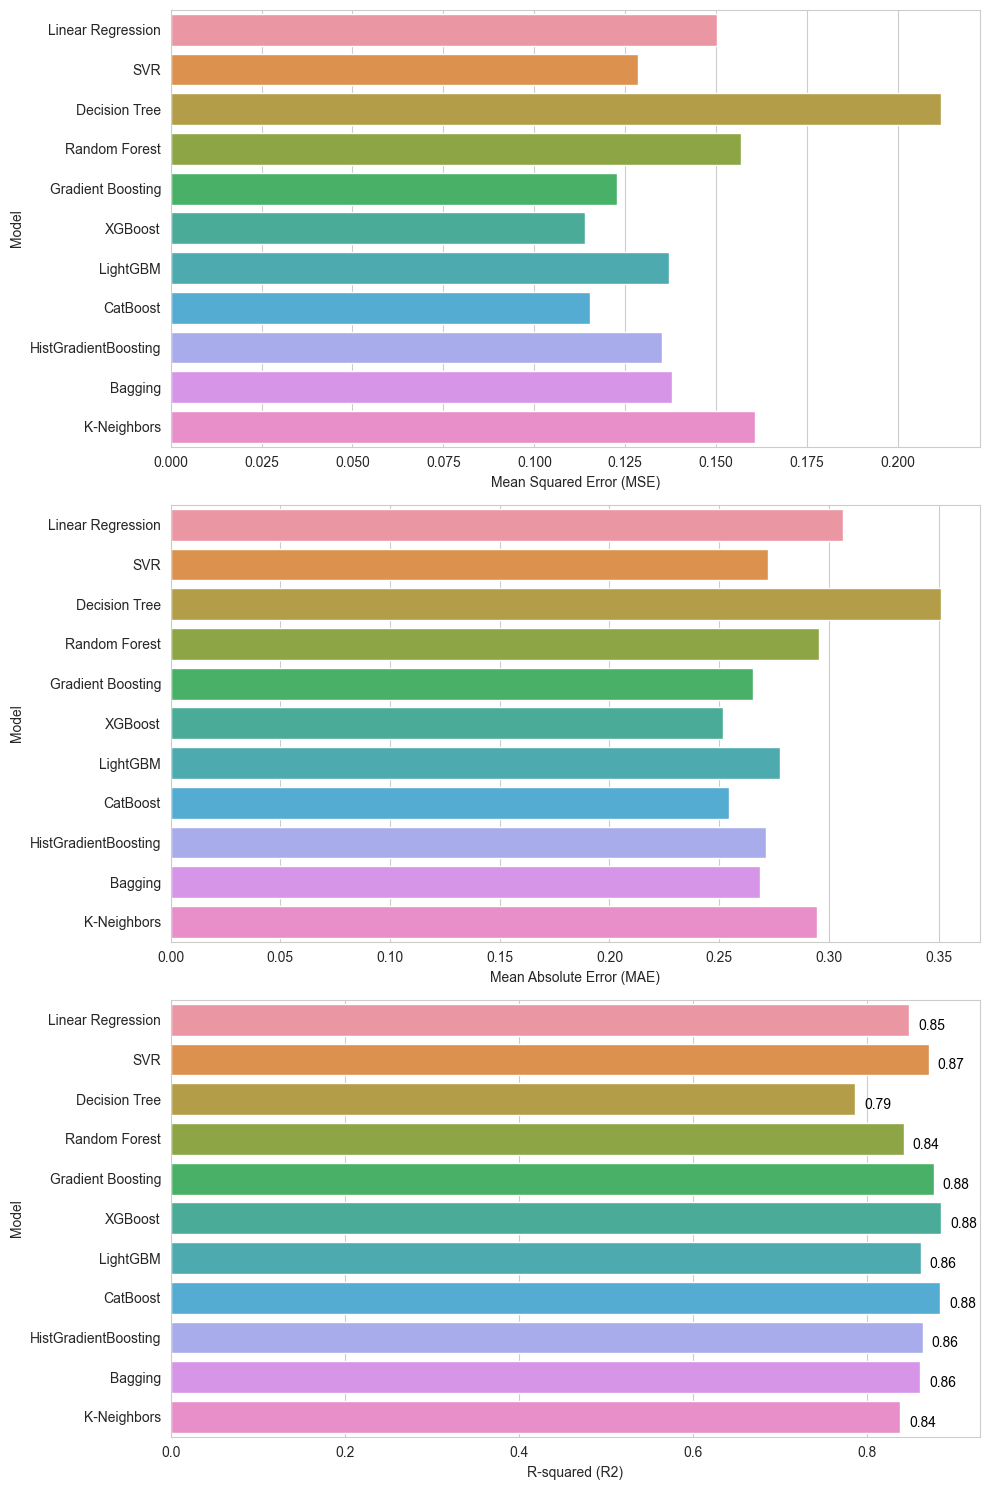

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the models and their respective hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'SVR': (SVR(), {'C': sp_uniform(0.1, 10), 'epsilon': sp_uniform(0.01, 0.1), 'gamma': ['scale', 'auto']}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': sp_randint(50, 200), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_samples_split': sp_randint(2, 11), 'min_samples_leaf': sp_randint(1, 11)}),
    'XGBoost': (XGBRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_child_weight': sp_randint(1, 6), 'gamma': sp_uniform(0, 0.5), 'subsample': sp_uniform(0.5, 0.5)}),
    'LightGBM': (LGBMRegressor(), {'n_estimators': sp_randint(50, 200), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'num_leaves': sp_randint(20, 100), 'min_data_in_leaf': sp_randint(10, 100)}),
    'CatBoost': (CatBoostRegressor(), {'iterations': sp_randint(500, 2000), 'learning_rate': sp_uniform(0.01, 0.1), 'depth': sp_randint(4, 10), 'l2_leaf_reg': sp_randint(1, 5)}),
    'HistGradientBoosting': (HistGradientBoostingRegressor(), {'max_iter': sp_randint(200, 500), 'learning_rate': sp_uniform(0.01, 0.1), 'max_depth': sp_randint(3, 20), 'min_samples_leaf': sp_randint(10, 50), 'l2_regularization': sp_uniform(0, 1)}),
    'Bagging': (BaggingRegressor(), {'n_estimators': sp_randint(50, 200), 'max_samples': sp_uniform(0.5, 0.5), 'max_features': sp_uniform(0.5, 0.5)}),
    'K-Neighbors': (KNeighborsRegressor(), {'n_neighbors': sp_randint(1, 20), 'weights': ['uniform', 'distance'], 'p': [1, 2]})
}



# Initialize a dictionary to hold the best models
best_models = {}

y_test = test_set['Price']
X_test = test_set.drop('Price', axis=1)

y_train = train_set['Price']
X_train = train_set.drop('Price', axis=1)


# For each model
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Perform hyperparameter tuning
    clf = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = clf.best_estimator_
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the metrics
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2 ): {r2}")
    print("\n")

# Create lists to hold model names and their metrics
model_names = []
mses = []
maes = []
r2s = []

# For each model
for model_name, model in best_models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the metrics to the lists
    model_names.append(model_name)
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)

# Create a DataFrame from the lists
results = pd.DataFrame({'Model': model_names, 'MSE': mses, 'MAE': maes, 'R2': r2s})

# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Create bar plots
sns.barplot(x='MSE', y='Model', data=results, ax=ax[0])
sns.barplot(x='MAE', y='Model', data=results, ax=ax[1])
bar_plot = sns.barplot(x='R2', y='Model', data=results, ax=ax[2])

# Set the labels
ax[0].set_xlabel('Mean Squared Error (MSE)')
ax[1].set_xlabel('Mean Absolute Error (MAE)')
ax[2].set_xlabel('R-squared (R2)')

# Add the R2 scores on the bar plot
for i, v in enumerate(results['R2']):
    ax[2].text(v + 0.01, i + .25, str(round(v, 2)), color='black')

# Show the plot
plt.tight_layout()
plt.show()


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min

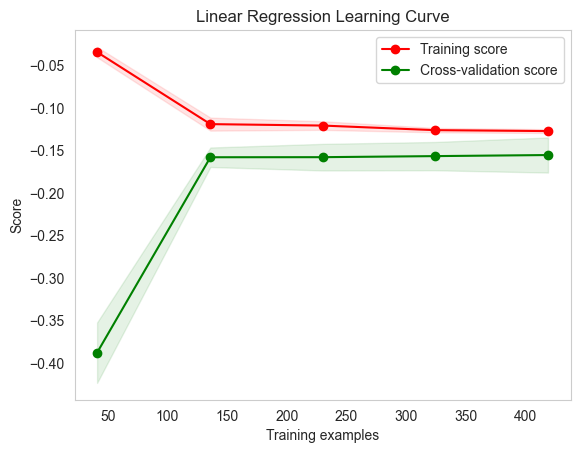

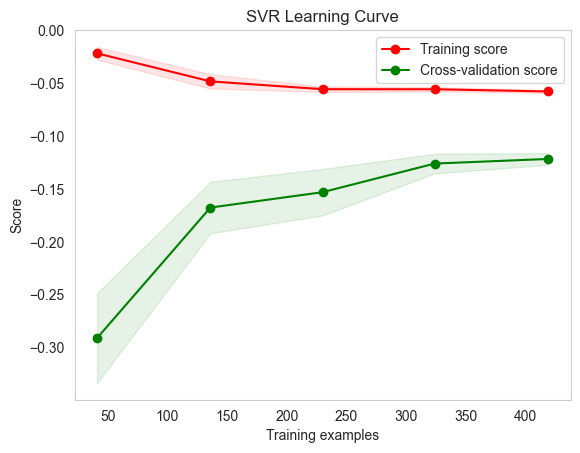

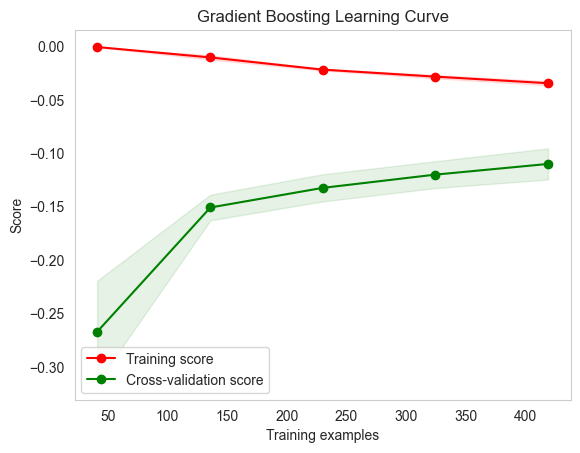

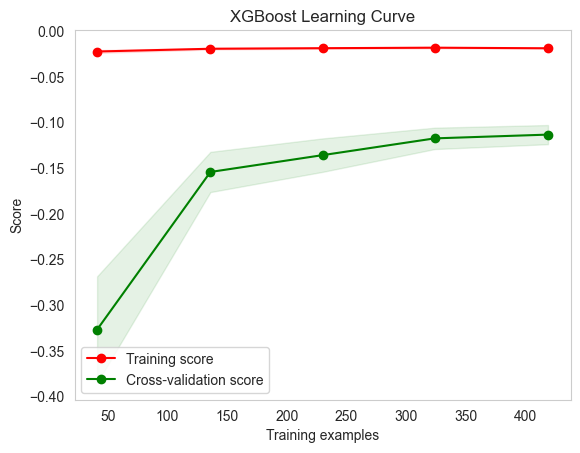

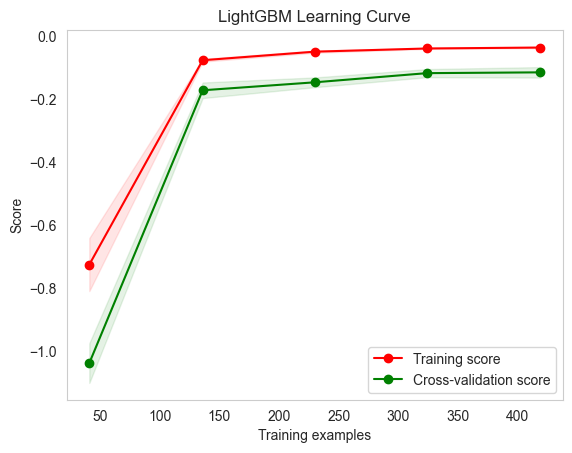

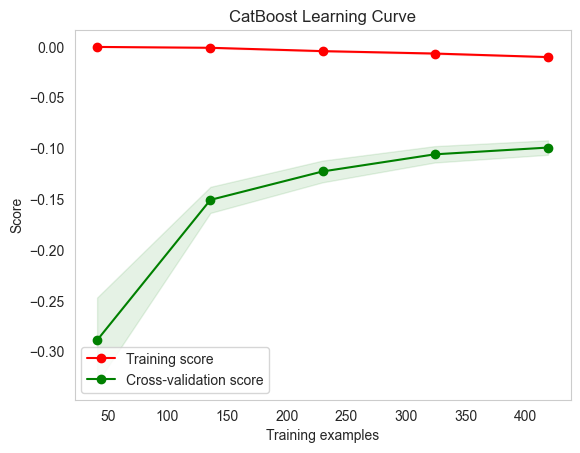

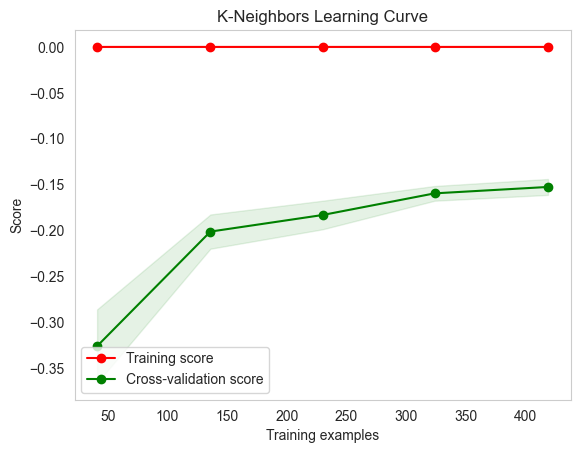

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scorer, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# For each model
for model_name, model in best_models.items():
    if model_name in ['Linear Regression', 'K-Neighbors', 'SVR', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']:
        plot_learning_curve(model, f"{model_name} Learning Curve", X_train, y_train, cv=5)
plt.show()
